In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
mpl.rcParams["mathtext.fontset"] = "stix"
from scipy.stats import combine_pvalues

from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri as rpyn
from statsmodels.stats.multitest import multipletests
dt = rpy2.robjects.packages.importr('diptest')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.special import logit
from scipy.special import expit

from sklearn.metrics import adjusted_rand_score

from scipy.stats import chisquare

from scipy.stats import hypergeom

In [345]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

# mRNA and quality of observations

This section explores each dataset's mRNA capture efficiency and splice junction read coverage.

This code generates figures 3a-g. It will require to process first the data, including the estimation of $\Psi$ observations and running the modified version of the Census normalization to estimate the number of captured mRNA molecules per cell.

In [228]:
# %run -i 'load_data.py'

### Figure 3a: captured mRNA estimation

Here we show the distribution of estimated mRNA molecules captured per cell in each dataset. The estimated number of captured mRNAs was determined using a variation of the Census normalization (Qiu et al., 2017).

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


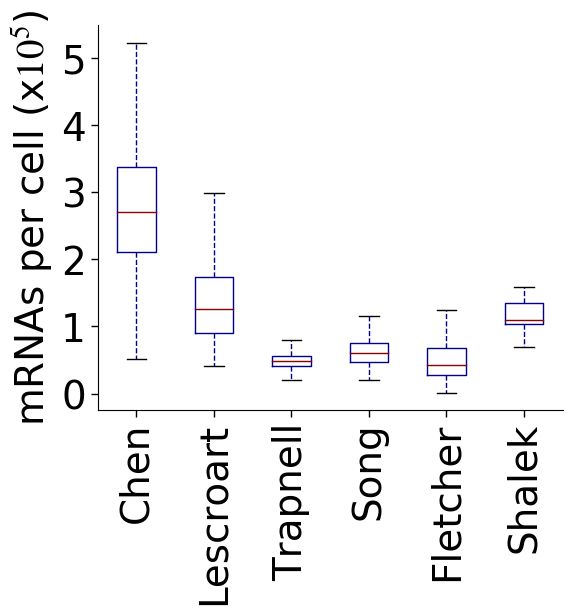

In [347]:
cuentas_chen = chen_mrna_counts.sum(axis=0)
cuentas_song = song_mrna_counts.sum(axis=0)
cuentas_trapnell = trapnell_mrna_counts.sum(axis=0)
cuentas_lescroart = lescroart_mrna_counts.sum(axis=0)
cuentas_das = das_mrna_counts.sum(axis=0)
cuentas_shalek = shalek_mrna_counts.sum(axis=0)

cuentas_df = [cuentas_chen, cuentas_lescroart, cuentas_trapnell, cuentas_song, cuentas_das, cuentas_shalek]
dset_names = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek']


scp.plot_boxplot(cuentas_df, 'mRNAs per cell (x$10^5$)', dset_names, 'mrna_cells_boxplot', xlocs = np.array([1, 2, 3, 4, 5, 6]),
                 ylocs=[0, 100000, 200000, 300000, 400000, 500000], 
                 ytags=['0', '1', '2', '3', '4', '5', '6'], save_dir='plots_review/figure3/')

plt.show()

### Figure 3b and Supplementary Figures 3c-f

For each exon, we compare the average number of mRNA molecules captured for its gene, versus the number of informative splice junction reads (included and excluded). We also observe the relationship of these variables with the percentage of cells that present binary values ($\Psi =0$ or $\Psi=1$) for each exon.

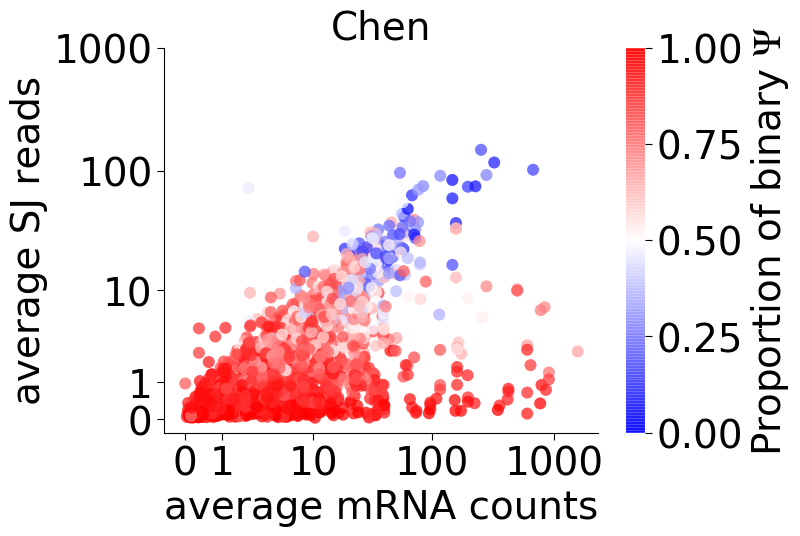

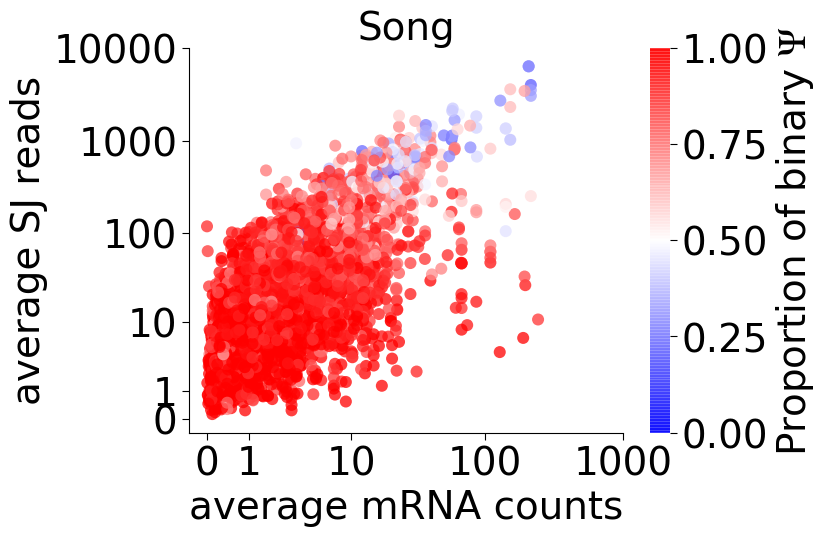

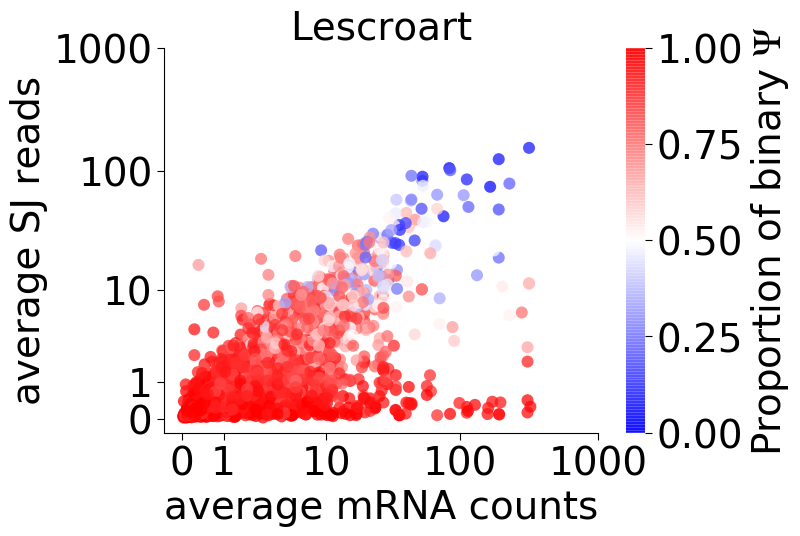

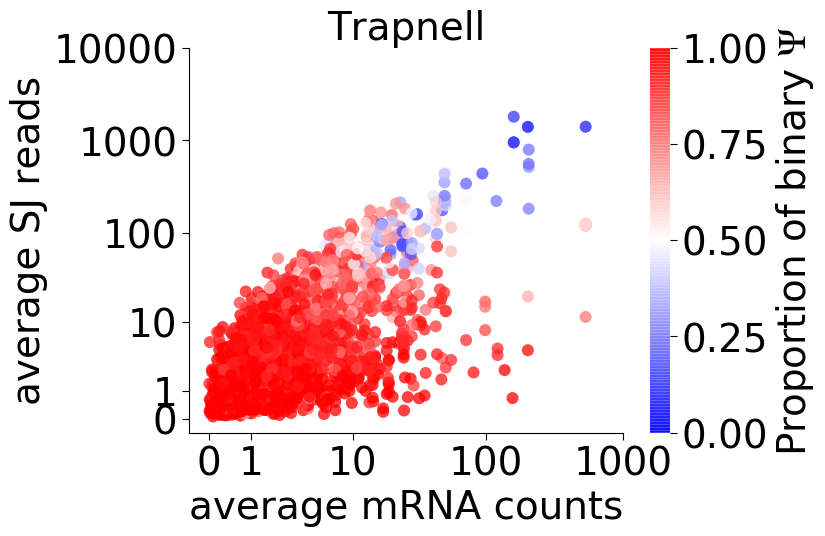

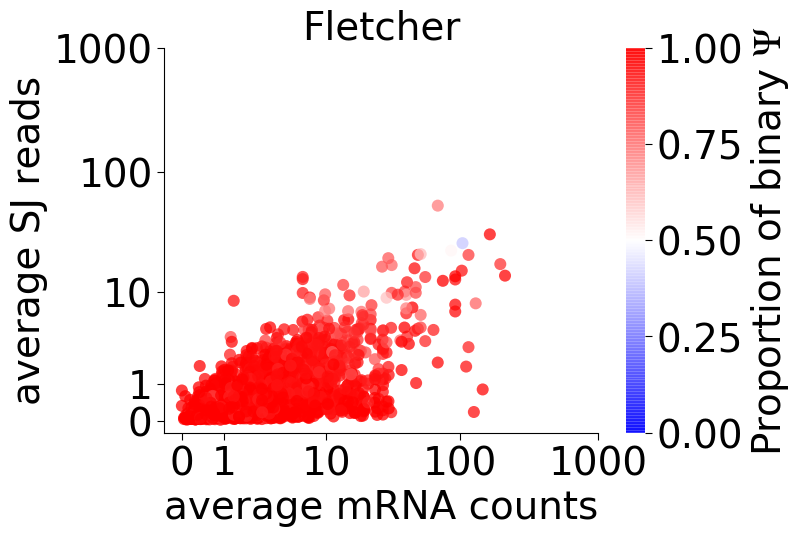

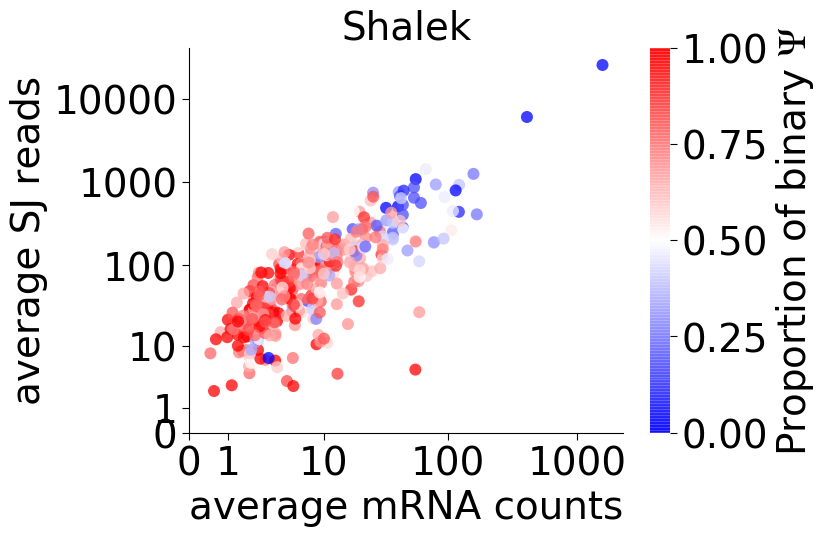

In [380]:
chen_int_genes, chen_int_exons = spu.get_int_events(chen_PSI, chen_mrna_counts, 0.05)
chen_int_exons = [x for x in chen_int_exons if x in mrna_per_event_chen.index]

song_int_genes, song_int_exons = spu.get_int_events(song_PSI, song_mrna_counts, 0.05)
song_int_exons = [x for x in song_int_exons if x in mrna_per_event_song.index]

trapnell_int_genes, trapnell_int_exons = spu.get_int_events(trapnell_PSI, trapnell_mrna_counts, 0.05)
trapnell_int_exons = [x for x in trapnell_int_exons if x in mrna_per_event_trapnell.index]

lescroart_int_genes, lescroart_int_exons = spu.get_int_events(lescroart_PSI, lescroart_mrna_counts, 0.05)
lescroart_int_exons = [x for x in lescroart_int_exons if x in mrna_per_event_lescroart.index]

das_int_genes, das_int_exons = spu.get_int_events(das_PSI, das_mrna_counts, 0.05)
das_int_exons = [x for x in das_int_exons if x in mrna_per_event_das.index]

shalek_int_genes, shalek_int_exons = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.05)
shalek_int_exons = [x for x in shalek_int_exons if x in mrna_per_event_shalek.index]

reads_song, mrna_song, binary_song, psi_song = spu.get_dataset_averages(song_PSI, song_read_counts, 
                                                                        song_mrna_counts, song_int_exons)
reads_das, mrna_das, binary_das, psi_das = spu.get_dataset_averages(das_PSI, das_read_counts, 
                                                                     das_mrna_counts, das_int_exons)
reads_chen, mrna_chen, binary_chen, psi_chen = spu.get_dataset_averages(chen_PSI, chen_read_counts, 
                                                                        chen_mrna_counts, chen_int_exons)
reads_lescroart, mrna_lescroart, binary_lescroart, psi_lescroart = spu.get_dataset_averages(lescroart_PSI, 
                                                                                            lescroart_read_counts, 
                                                                                            lescroart_mrna_counts, 
                                                                                             lescroart_int_exons)
reads_trapnell, mrna_trapnell, binary_trapnell, psi_trapnell = spu.get_dataset_averages(trapnell_PSI, trapnell_read_counts, 
                                                                          trapnell_mrna_counts, trapnell_int_exons)
reads_shalek, mrna_shalek, binary_shalek, psi_shalek = spu.get_dataset_averages(shalek_PSI, shalek_read_counts, 
                                                                          shalek_mrna_counts, shalek_int_exons)

scp.plot_information_map2(mrna_chen, reads_chen, binary_chen, 'Chen', 
                         [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                         stat = 'median', 
                         mrna_min = 10, read_min = (10*chen_coverage_tab['SJ_coverage']).mean(), 
                          save_name = 'chen_binary_median',
                         plot_dir = 'plots_review/figure3/')


scp.plot_information_map2(mrna_song, reads_song, binary_song, 'Song',
                          [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001), np.log10(10001)],
                         ['0', '1', '10', '100', '1000', '10000'],
                         stat = 'median', max_x = 3, max_y = 4,
                         save_name = 'song_binary_median', mrna_min = 10, 
                         read_min=(10*song_coverage_tab['SJ_coverage']).mean(),
                         plot_dir = 'plots_review/figure3/')

scp.plot_information_map2(mrna_lescroart, reads_lescroart, binary_lescroart, 'Lescroart', 
                          [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                         stat = 'median', save_name = 'lescroart_binary_median', mrna_min = 10, 
                         read_min=(10*lescroart_coverage_tab['SJ_coverage']).mean(), 
                          plot_dir = 'plots_review/figure3/')

scp.plot_information_map2(mrna_trapnell, reads_trapnell, binary_trapnell,
                     'Trapnell',  [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001), np.log10(10001)],
                         ['0', '1', '10', '100', '1000', '10000'],
                         stat = 'median', save_name = 'trapnell_binary_median', 
                          max_x = 3, max_y = 4, mrna_min = 10, read_min=(10*trapnell_coverage_tab['SJ_coverage']).mean(),
                         plot_dir = 'plots_review/figure3/')

scp.plot_information_map2(mrna_das, reads_das, binary_das,
                     'Fletcher', [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                         stat = 'median', save_name = 'fletcher_binary_median', mrna_min = 10, 
                          read_min=(10*das_coverage_tab['SJ_coverage']).mean(),
                         plot_dir = 'plots_review/figure3/')

scp.plot_information_map2(mrna_shalek, reads_shalek, binary_shalek,
                     'Shalek', [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001), np.log10(10001)],
                         ['0', '1', '10', '100', '1000', '10000'],
                         stat = 'median', save_name = 'shalek_binary_median', mrna_min = 10, 
                          read_min=(10*shalek_coverage_tab['SJ_coverage']).mean(),
                         plot_dir = 'plots_review/figure3/')

plt.show()

### Figure 3c: RNA-seq reads per splice junction

Estimation of the read coverage of each splice junction. This ratio was estimated as follows:

$$ SJ_j = \frac{\text{total splice junction reads in cell }j}{\text{total splice junctions in mRNAs of cell }j} = \frac{\sum_k r_{jk}}{\sum_k s_k m_{jk}}$$

Where $r_{jk}$ is the number of reads spanning constitutive splice junctions of gene $k$ in cell $j$, $s_k$ is the number of constitutive splice junctions of gene $k$, and $m_{jk}$ is the number of mRNA molecules of gene $k$ in cell $j$.

The number of reads spanning constitutive junctions were obtained from the **SJ.out.tab** output from the STAR alignment of each single cell. Constutive junctions were determined as junctions that appear in all annotated transcripts of each protein coding gene in the Gencode annotation (versions hg38 for human, mm10 for mouse).

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


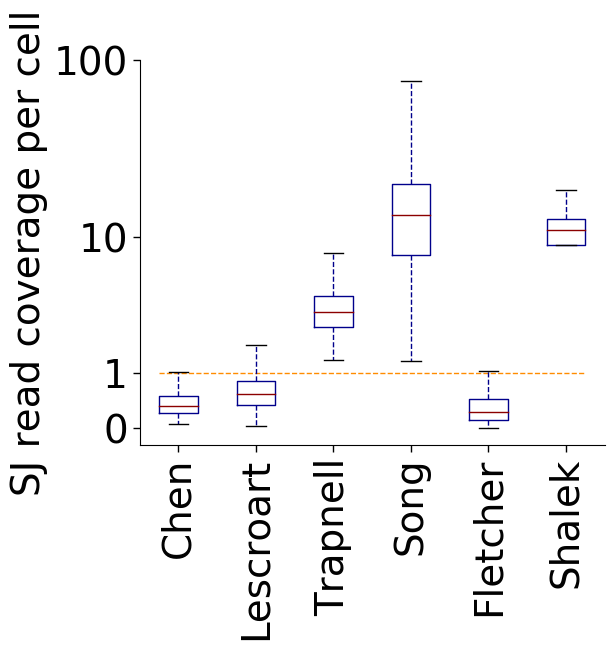

In [350]:
dset_names = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek']

scp.plot_boxplot([np.log10(chen_coverage_tab['SJ_coverage']+1),np.log10(lescroart_coverage_tab['SJ_coverage']+1), 
                  np.log10(trapnell_coverage_tab['SJ_coverage']+1), np.log10(song_coverage_tab['SJ_coverage']+1), 
                  np.log10(das_coverage_tab['SJ_coverage']+1), np.log10(shalek_coverage_tab['SJ_coverage']+1)], 
                 'SJ read coverage per cell', dset_names, 
                 'reads_per_SJ_per_cell', ylocs = [0, np.log10(2), np.log10(11), np.log10(101)],
                 xlocs = np.array([1, 2, 3, 4, 5, 6]),
                 ytags = ['0', '1', '10', '100'], plot_line = np.log10(2), save_dir='plots_review/figure3/')

plt.show()

### Figure 3d and supplementary figure 3f

PCA projection of the Chen et al., 2016 motor neuron differentiation. PCA projection was based on gene expression normalized with SCONE (Cole et al., 2019). Cell clusters were defined through agglomerative clustering.

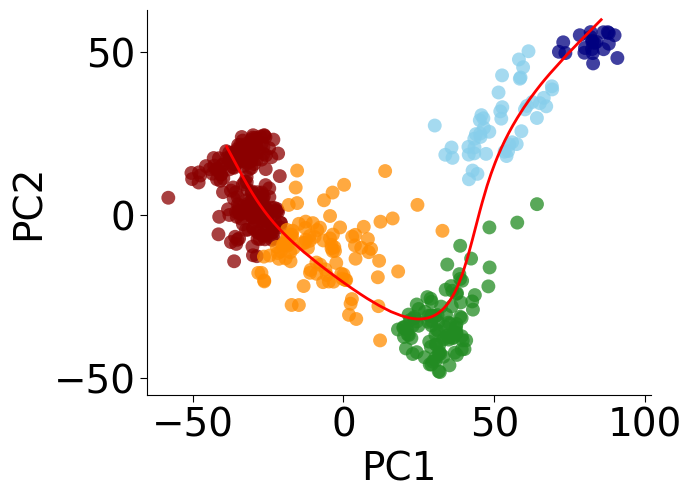

In [351]:
figsize(6.5,5)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.AC==0], 
           chen_pca_clust.PC2.loc[chen_pca_clust.AC==0], 
           c='darkred', s=100, edgecolors='none', label='ES', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.AC==1], 
           chen_pca_clust.PC2.loc[chen_pca_clust.AC==1], 
           c='darkorange', s=100, edgecolors='none', label='Epi, early', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.AC==2], 
           chen_pca_clust.PC2.loc[chen_pca_clust.AC==2], 
           c='forestgreen', s=100, edgecolors='none', label='Epi, late', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.AC==3], 
           chen_pca_clust.PC2.loc[chen_pca_clust.AC==3], 
           c='skyblue', s=100, edgecolors='none', label='MN, early', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.AC==4], 
           chen_pca_clust.PC2.loc[chen_pca_clust.AC==4], 
           c='navy', s=100, edgecolors='none', label='MN, late', alpha=0.75)

ax.plot(chen_pca_clust.line_1, chen_pca_clust.line_2, c='red',linewidth=2, label='lineage')


ax.set_xlim([-65, 102])
ax.set_ylim([-55, 63])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


ax.tick_params(labelsize=28, length=5)

plt.ylabel('PC2', fontsize=28)
plt.xlabel('PC1', fontsize=28)
# plt.title(event.split('_')[0], fontsize=48)

plt.savefig('plots_review/figure3/PCA_AC_chen.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/PCA_AC_chen.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/PCA_AC_chen.png', bbox_inches='tight', transparent=True)

# plt.legend(frameon=False, fontsize = 24, loc='lower right')

plt.show()

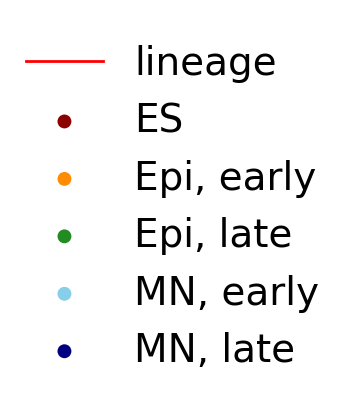

In [352]:
figsize(4,3)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

ax.scatter([],[], c='darkred', s=100, edgecolors='none', label='ES')
ax.scatter([],[], c='darkorange', s=100, edgecolors='none', label='Epi, early')
ax.scatter([],[], c='forestgreen', s=100, edgecolors='none', label='Epi, late')
ax.scatter([],[], c='skyblue', s=100, edgecolors='none', label='MN, early')
ax.scatter([],[], c='navy', s=100, edgecolors='none', label='MN, late')


ax.plot([], c='red',linewidth=2, label='lineage')


ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend(fontsize=28, frameon=False)

plt.savefig('plots_review/figure3/PCA_AC_chen_labels.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/PCA_AC_chen_labels.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/PCA_AC_chen_labels.png', bbox_inches='tight', transparent=True)
plt.show()

Same PCA projection, coloring of cells made by annotated cell type provided by the authors of the study.

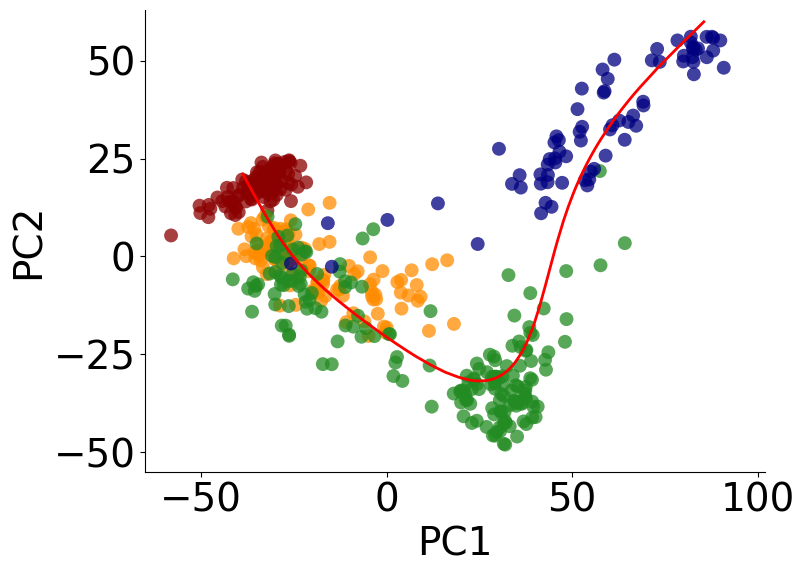

In [353]:
figsize(8,6)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.cell_type=='ES2i'], 
           chen_pca_clust.PC2.loc[chen_pca_clust.cell_type=='ES2i'], 
           c='darkred', s=100, edgecolors='none', label='ES2i', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.cell_type=='ES'], 
           chen_pca_clust.PC2.loc[chen_pca_clust.cell_type=='ES'], 
           c='darkorange', s=100, edgecolors='none', label='ES', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.cell_type=='Epi'], 
           chen_pca_clust.PC2.loc[chen_pca_clust.cell_type=='Epi'], 
           c='forestgreen', s=100, edgecolors='none', label='Epi', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.cell_type=='Motor neuron'], 
           chen_pca_clust.PC2.loc[chen_pca_clust.cell_type=='Motor neuron'], 
           c='navy', s=100, edgecolors='none', label='MN', alpha=0.75)

ax.plot(chen_pca_clust.line_1, chen_pca_clust.line_2, c='red',linewidth=2, label='lineage')


ax.set_xlim([-65, 102])
ax.set_ylim([-55, 63])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


ax.tick_params(labelsize=28)

plt.ylabel('PC2', fontsize=28)
plt.xlabel('PC1', fontsize=28)
# plt.title(event.split('_')[0], fontsize=48)
plt.savefig('plots_review/figure3/PCA_cell_type_chen.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/PCA_cell_type_chen.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/PCA_cell_type_chen.png', bbox_inches='tight', transparent=True)
# plt.legend(frameon=False, fontsize = 24, loc='lower right')

plt.show()

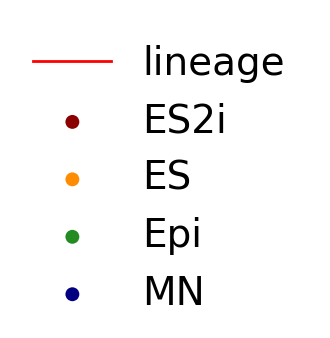

In [354]:
figsize(4,3)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

ax.scatter([],[], c='darkred', s=100, edgecolors='none', label='ES2i')
ax.scatter([],[], c='darkorange', s=100, edgecolors='none', label='ES')
ax.scatter([],[], c='forestgreen', s=100, edgecolors='none', label='Epi')
ax.scatter([],[], c='navy', s=100, edgecolors='none', label='MN')


ax.plot([], c='red',linewidth=2, label='lineage')


ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend(fontsize=28, frameon=False)

plt.savefig('plots_review/figure3/PCA_cell_type_chen_labels.svg', bbox_inches='tight')
plt.savefig('plots_review/figure3/PCA_cell_type_chen_labels.pdf', bbox_inches='tight')
plt.savefig('plots_review/figure3/PCA_cell_type_chen_labels.png', bbox_inches='tight')
plt.show()

### Figure 3e

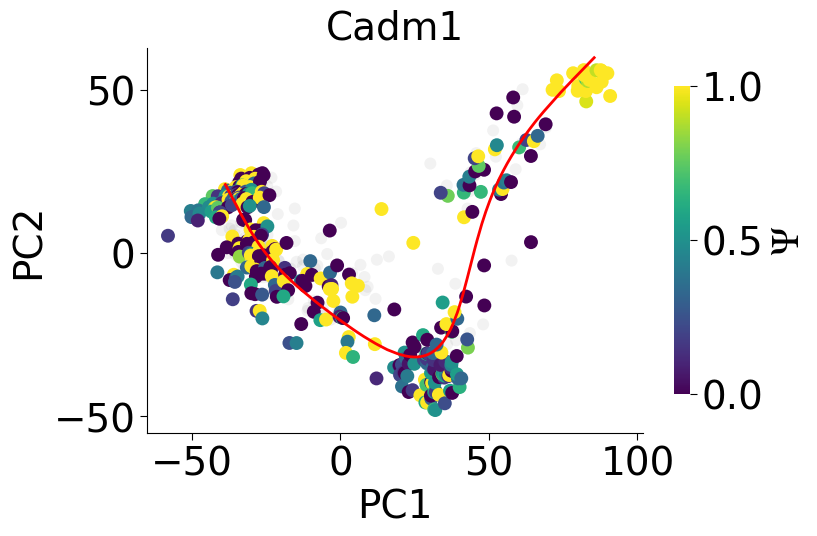

In [355]:
# figsize(14,10)
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Cadm1_2', 10, filter_cells=False, plot_dir = 'plots_review/figure3/events/')

### Figure 3f

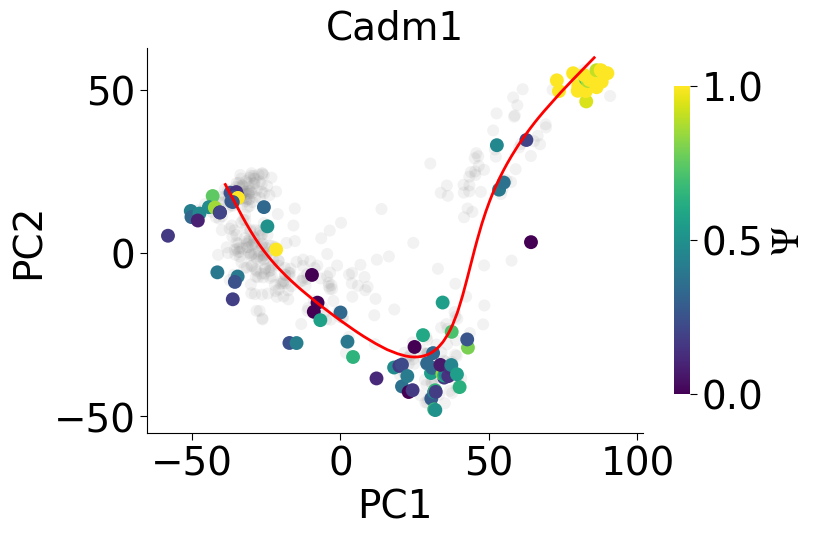

In [356]:
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Cadm1_2', 10, filter_cells=True, plot_dir = 'plots_review/figure3/events/')

### Figure 3g: Stacked histograms

Distribution of $\Psi$ densities in selected exons for each cell cluster. For each exon $k$, we only consider an observation in a given cell $j$ if:
* There are at least 10 mRNA molecules of the gene that contains the exon in the cell.
* There are at least $10 \cdot SJ_j (1-\Psi_kj)$ informative junction reads of the exon in the cell.

Where $SJ_j$ is the splice junction read coverage in cell $j$, and $\Psi_kj$ is the observed $\Psi$ for exon $k$ in cell $j$. 


../../utils/single_cell_plots.py:908: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


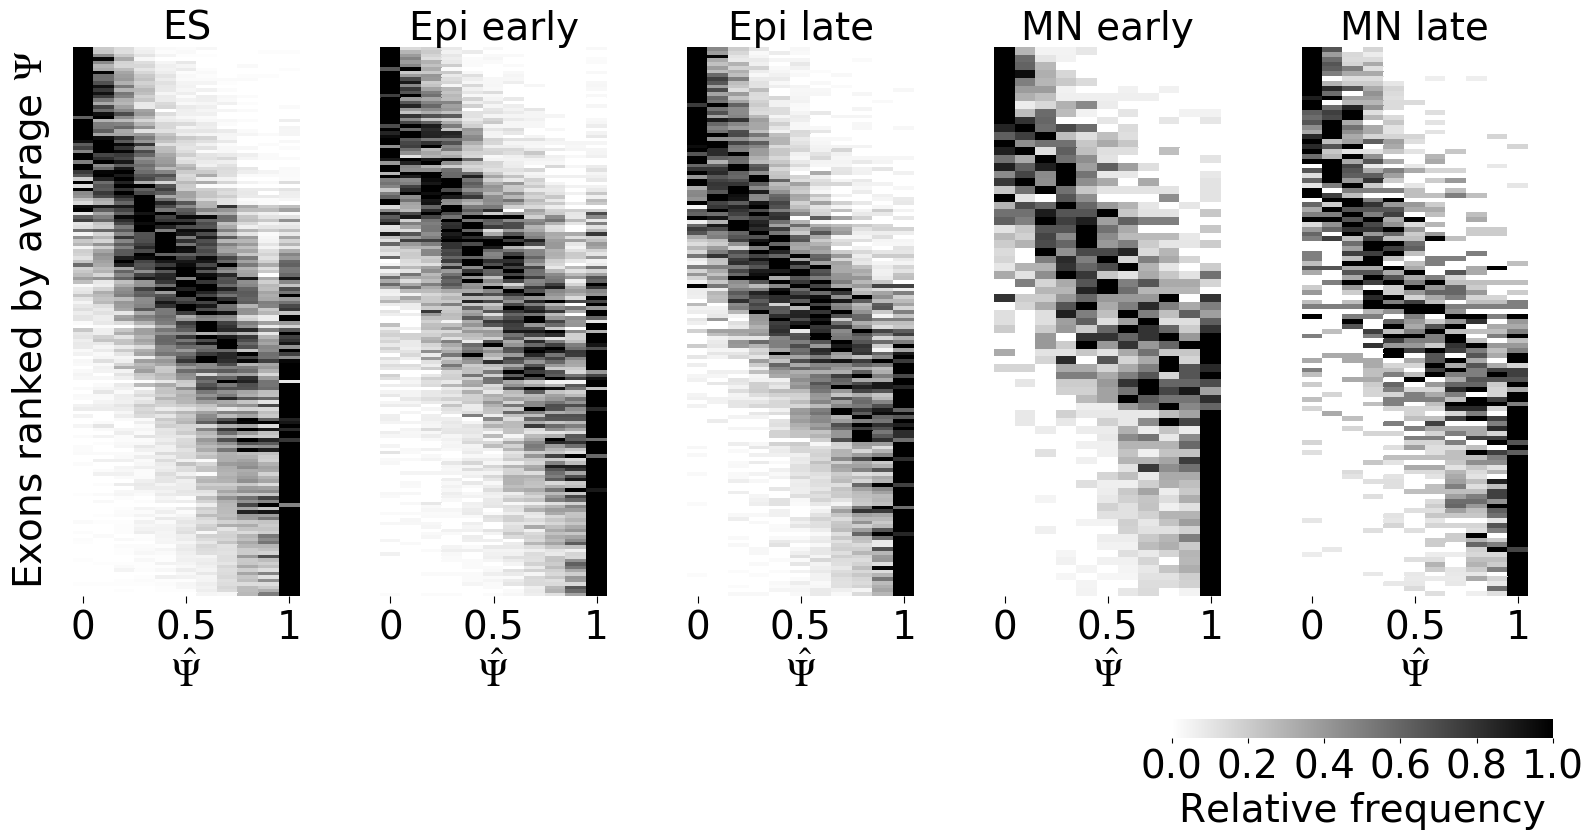

In [357]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"


hist_list = [x[4] for x in chen_clust_filter]

dset_name_list = ['ES', 'Epi early', 'Epi late', 'MN early', 'MN late']


scp.plot_histograms(hist_list, dset_name_list, fig_len=16, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'PSI_distributions_filtered_clusters_chen',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=28, sk=4, tfs=20, nbins=11, name_size=28, wspace=2, hspace=0.1)

plt.show()

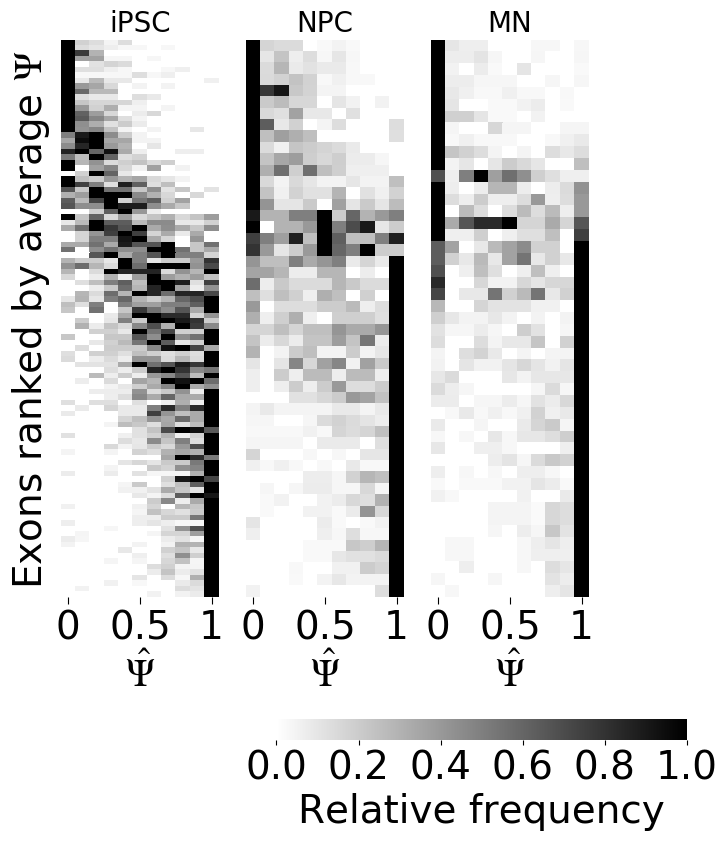

In [358]:
hist_list = [x[4] for x in song_clust_filter]

dset_name_list = ['iPSC', 'NPC', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'PSI_distributions_filtered_clusters_song',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=28, sk=3, tfs=20, nbins=11)

plt.show()

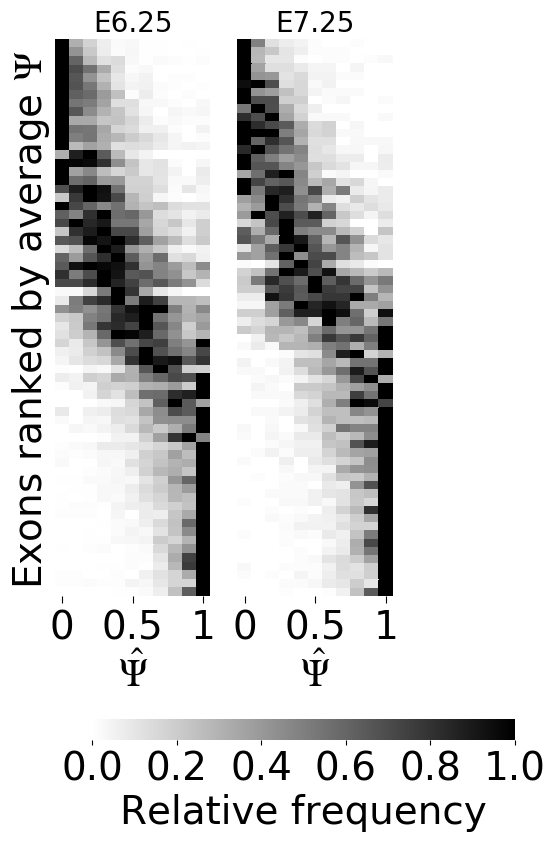

In [359]:
lescroart_clust_filter = []
for cluster in lescroart_pca_clust.cell_type.unique():
    clust_subpop = lescroart_pca_clust.index[lescroart_pca_clust.cell_type == cluster]
    
    lescroart_filter = process_subpop(clust_subpop, lescroart_PSI, lescroart_mrna_counts, mrna_per_event_lescroart, 
                                 lescroart_read_counts, lescroart_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    lescroart_clust_filter.append(lescroart_filter)
    

hist_list = [x[4] for x in lescroart_clust_filter]

dset_name_list = ['E6.25', 'E7.25']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=-0.01, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'PSI_distributions_filtered_clusters_lescroart',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=28, sk=3, tfs=20, nbins=11)

plt.show()

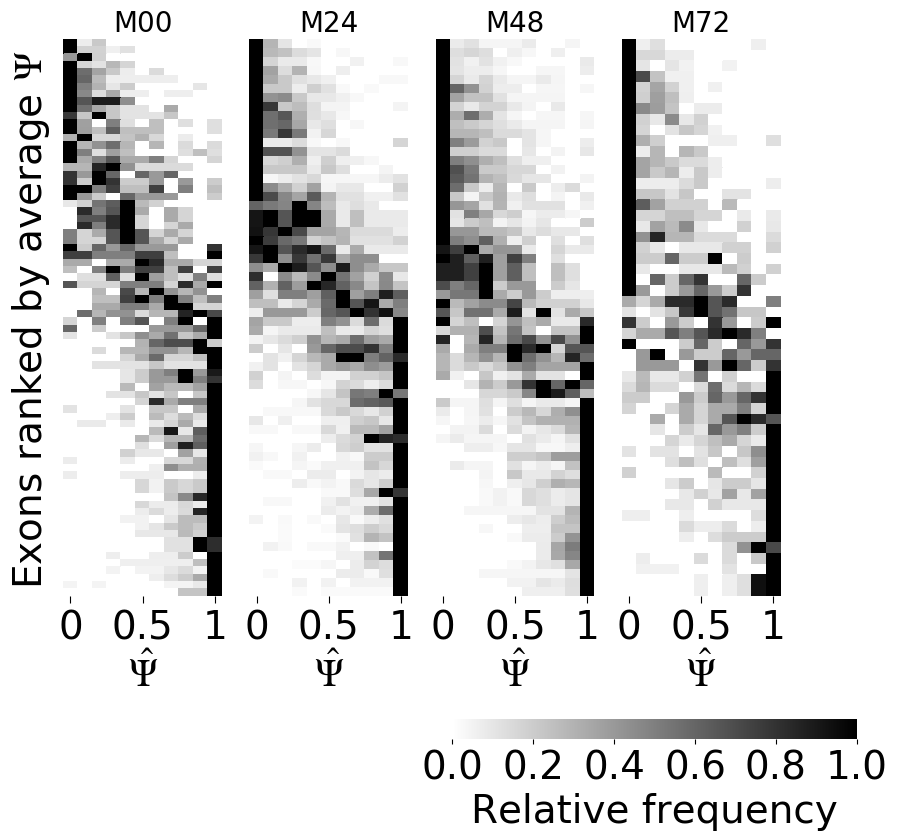

In [360]:
hist_list = [x[4] for x in trapnell_clust_filter]

dset_name_list = ['M00', 'M24', 'M48', 'M72']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.01, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'PSI_distributions_filtered_clusters_trapnell',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$',ls=28, sk=3, tfs=20, nbins=11)

plt.show()

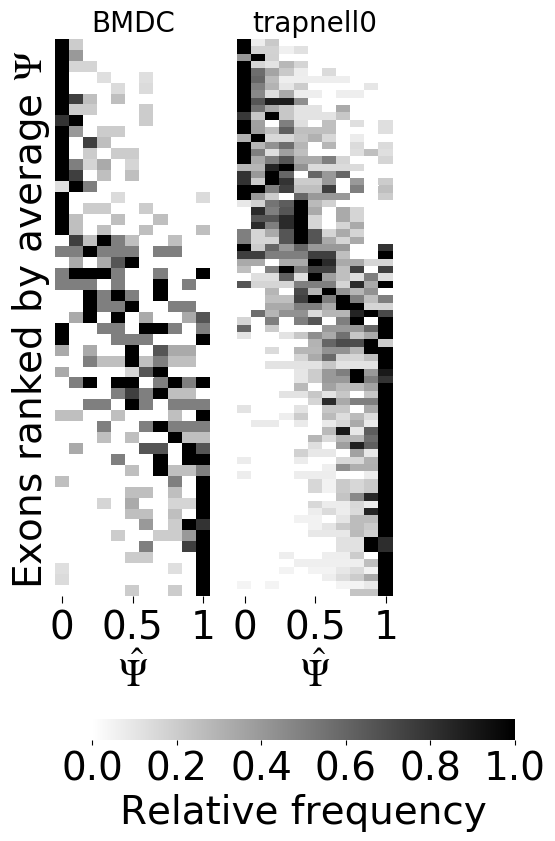

In [361]:
shalek_int_genes_10, shalek_int_exons_10 = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.1)
shalek_int_exons_10 = [x for x in shalek_int_exons_10 if x in mrna_per_event_shalek.index]

shalek_filtered_10 = process_subpop(shalek_PSI.columns, shalek_PSI, shalek_mrna_counts, mrna_per_event_shalek, 
                                 shalek_read_counts, shalek_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)

scp.plot_histograms([shalek_filtered_10[4], trapnell_clust_filter[0][4]], 
                    ['BMDC', 'trapnell0'], fig_len=10, fig_height = 10, ypos1=-0.01, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'PSI_distributions_filtered_clusters_shalek',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=28, sk=3, tfs=20, nbins=11)


In [362]:
das_sra = pd.read_csv('/mnt/c/Users/ferna/Desktop/SingleCell/data/das/SraRunTable.txt', sep='\t', index_col = 6)
das_sra = das_sra.loc[das_PSI.columns]
das_clust_filter = []
for cluster in sorted(das_sra.age.unique()):
    clust_subpop = das_sra.index[das_sra.age == cluster]
    
    das_filter = process_subpop(clust_subpop, das_PSI, das_mrna_counts, mrna_per_event_das, 
                                 das_read_counts, das_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    das_clust_filter.append(das_filter)

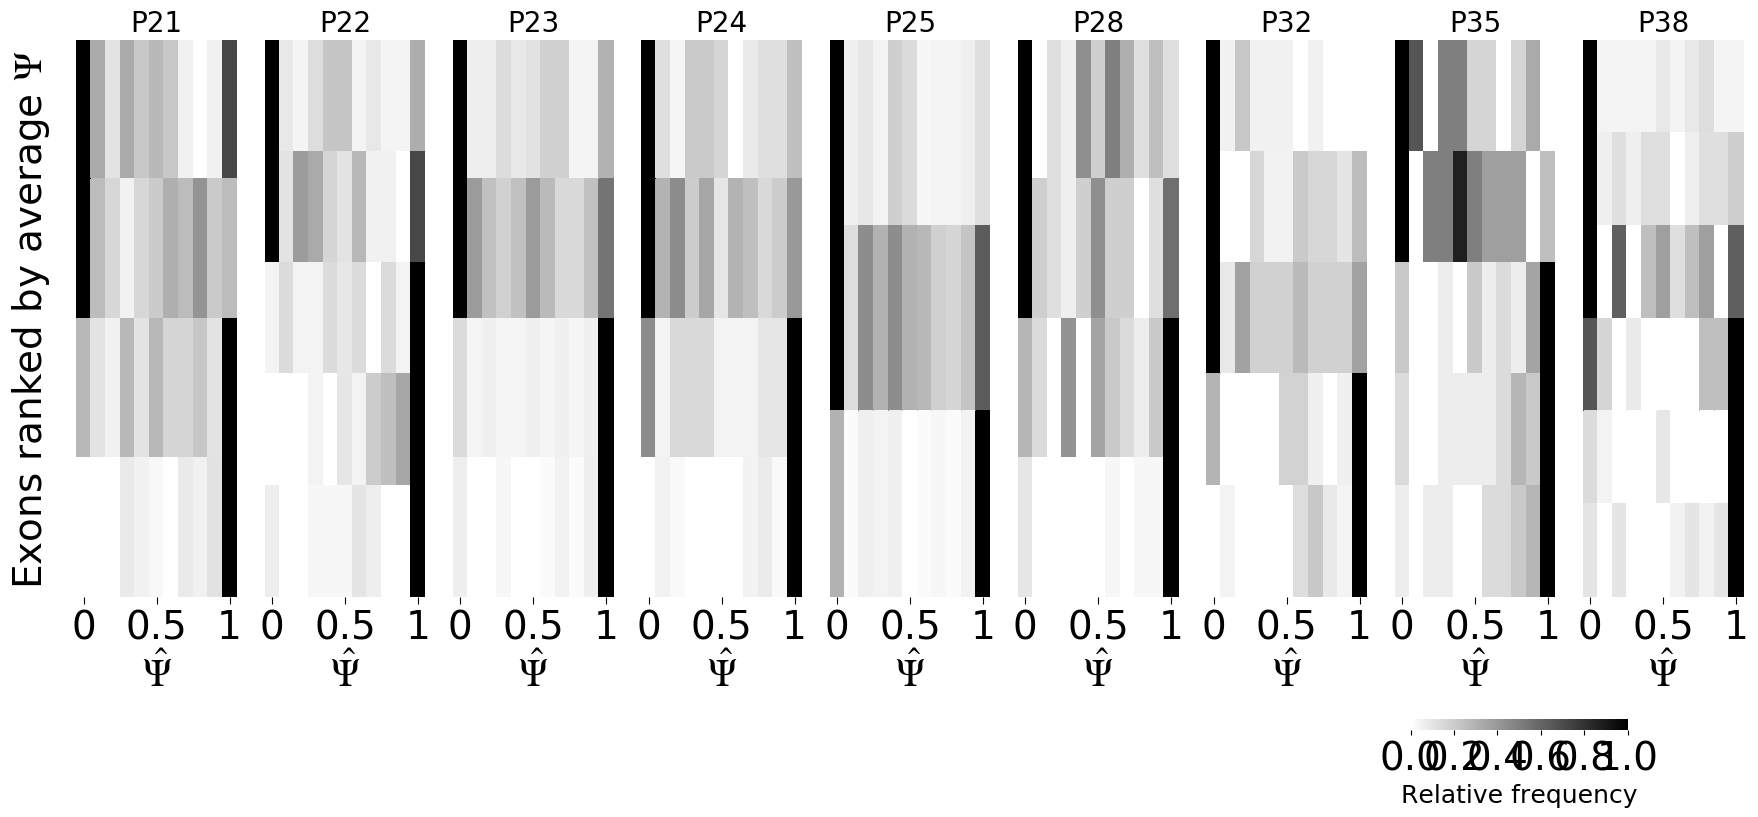

In [363]:
hist_list = [x[4] for x in das_clust_filter]

dset_name_list =sorted(das_sra.age.unique())


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'PSI_distributions_filtered_clusters_das',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

### Quantifying selected exons

In [364]:
chen_filtered = filter_psi(chen_PSI, chen_int_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'], 
                           chen_read_counts, 10, 0, cell_min=0.5)

lescroart_filtered = filter_psi(lescroart_PSI, lescroart_int_exons, mrna_per_event_lescroart, lescroart_coverage_tab['SJ_coverage'], 
                           lescroart_read_counts, 10, 0, cell_min=0.5)

trapnell_filtered = filter_psi(trapnell_PSI, trapnell_int_exons, mrna_per_event_trapnell, trapnell_coverage_tab['SJ_coverage'], 
                           trapnell_read_counts, 10, 0, cell_min=0.5)

song_filtered = filter_psi(song_PSI, song_int_exons, mrna_per_event_song, song_coverage_tab['SJ_coverage'], 
                           song_read_counts, 10, 0, cell_min=0.5)

das_filtered = filter_psi(das_PSI, das_int_exons, mrna_per_event_das, das_coverage_tab['SJ_coverage'], 
                           das_read_counts, 10, 0, cell_min=0.5)

shalek_filtered = filter_psi(shalek_PSI, shalek_int_exons, mrna_per_event_shalek, shalek_coverage_tab['SJ_coverage'], 
                           shalek_read_counts, 10, 0, cell_min=0.5)

filtered_exons_count = []
filtered_exons_count.append(chen_filtered[0].shape[0])
filtered_exons_count.append(lescroart_filtered[0].shape[0])
filtered_exons_count.append(trapnell_filtered[0].shape[0])
filtered_exons_count.append(song_filtered[0].shape[0])
filtered_exons_count.append(das_filtered[0].shape[0])
filtered_exons_count.append(shalek_filtered[0].shape[0])

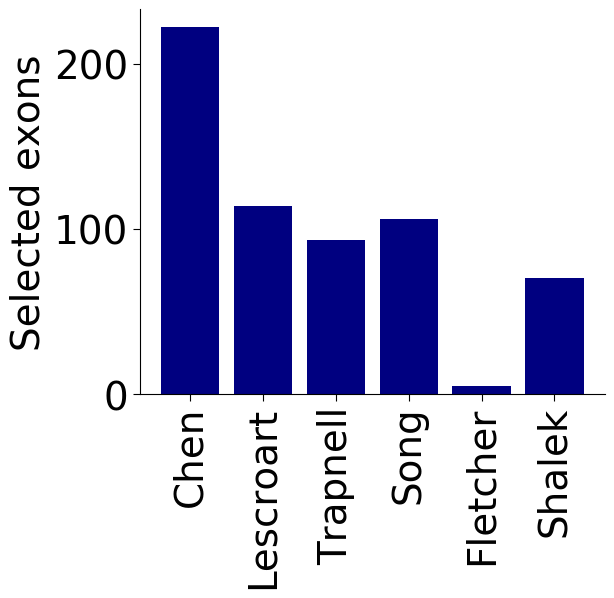

In [365]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.bar([1, 2, 3, 4, 5, 6], filtered_exons_count, color='navy')
ax.tick_params(labelsize=28)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

ax.xaxis.set_tick_params(length=5)
ax.yaxis.set_tick_params(length=5)


plt.ylabel("Selected exons", fontsize=28)

locs, labels = plt.yticks()


plt.xticks([1, 2, 3, 4, 5, 6], ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek'], 
           fontsize=28, rotation='vertical')    

plt.savefig('plots_review/figure3/selected_exons_per_dataset.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/selected_exons_per_dataset.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/selected_exons_per_dataset.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

### All selected exons

In [366]:
selected_counts = []

chen_selected_list = []
for cluster in chen_clust_filter_05:
    chen_selected_list.extend(list(cluster[0].index))
    
selected_counts.append(len(sorted(set(chen_selected_list))))

lescroart_selected_list = []
for cluster in lescroart_clust_filter_05:
    lescroart_selected_list.extend(list(cluster[0].index))
    
selected_counts.append(len(sorted(set(lescroart_selected_list))))

trapnell_selected_list = []
for cluster in trapnell_clust_filter_05:
    trapnell_selected_list.extend(list(cluster[0].index))
    
selected_counts.append(len(sorted(set(trapnell_selected_list))))

song_selected_list = []
for cluster in song_clust_filter_05:
    song_selected_list.extend(list(cluster[0].index))
    
selected_counts.append(len(sorted(set(song_selected_list))))

das_selected_list = []
for cluster in das_clust_filter_05:
    das_selected_list.extend(list(cluster[0].index))
    
selected_counts.append(len(sorted(set(das_selected_list))))

selected_counts.append(shalek_filtered[0].shape[0])

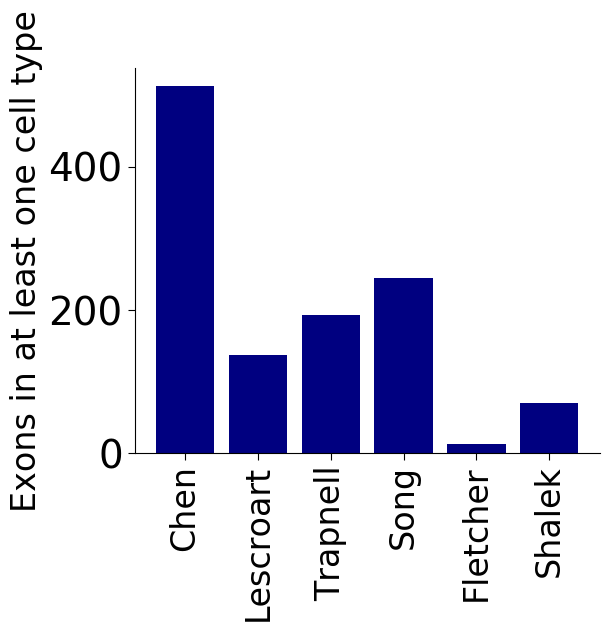

In [367]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.bar([1, 2, 3, 4, 5, 6], selected_counts, color='navy')
ax.tick_params(labelsize=28)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

ax.xaxis.set_tick_params(length=5)
ax.yaxis.set_tick_params(length=5)


plt.ylabel("Exons in at least one cell type", fontsize=24)

locs, labels = plt.yticks()


plt.xticks([1, 2, 3, 4, 5, 6], ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek'], 
           fontsize=24, rotation='vertical')    

plt.savefig('plots_review/figure3/selected_exons_per_cell_type_per_dataset.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/selected_exons_per_cell_type_per_dataset.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/selected_exons_per_cell_type_per_dataset.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

### Bimodality curves

In [368]:
%run -i 'bimodality_curves.py'

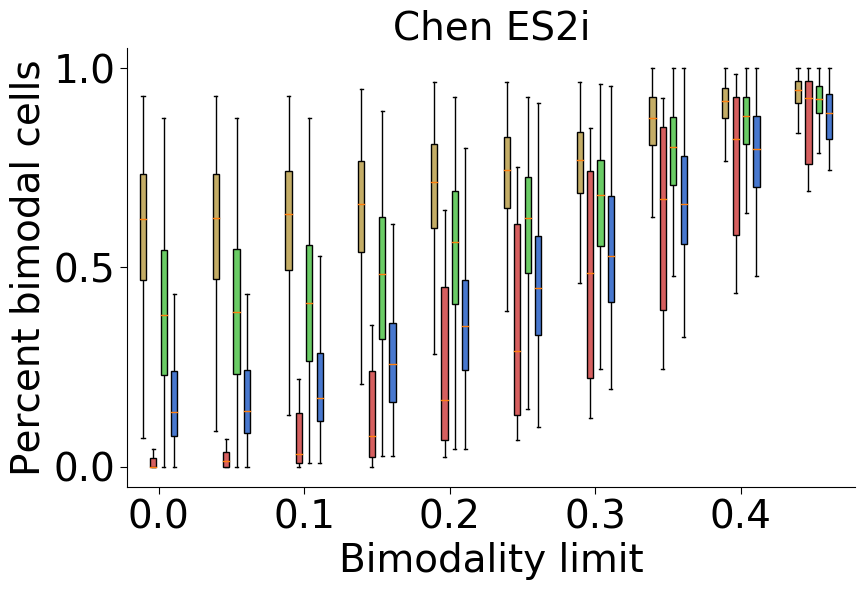

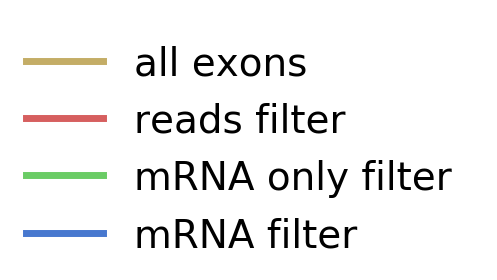

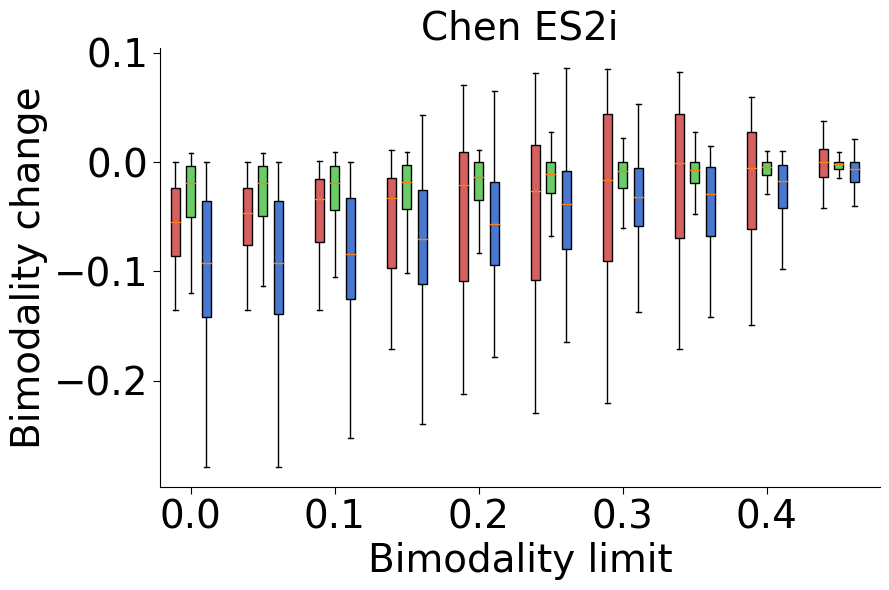

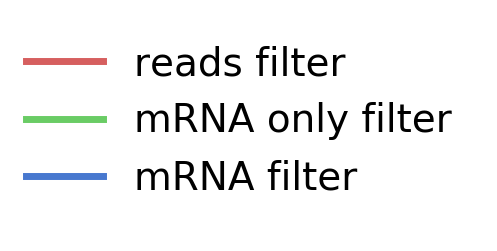

Median AUC in all exons: 0.3823335095137421

Median AUC in read selected exons: 0.19789719626168223
Change is significant with respect to all exons (adj pval = 9.496728483148755e-11)
Change is not significant with respect to all exons (adj pval = 0.5019153153059346)

Median AUC in mRNA only selected exons: 0.3265625
Change is significant with respect to all exons (adj pval = 1.1176458863842513e-18)
Filtering observations does not reduce AUC significantly (adj pval = 0.17963032614821517)

Median AUC in mRNA selected exons: 0.24166666666666664
Change is significant with respect to all exons (adj pval = 6.59617982712021e-35)
Filtering observations reduces AUC significantly (adj pval = 0.0024750673631839418)



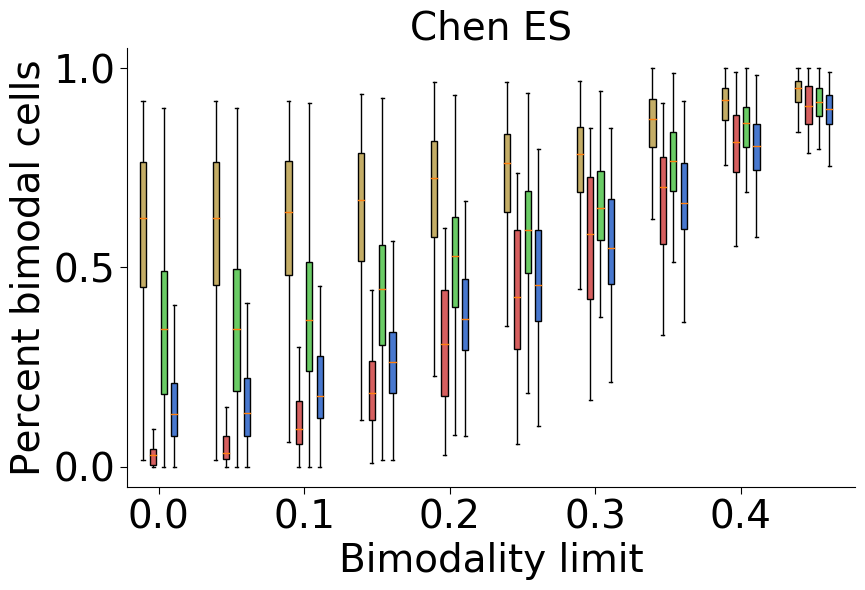

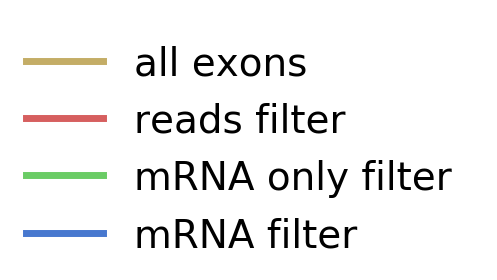

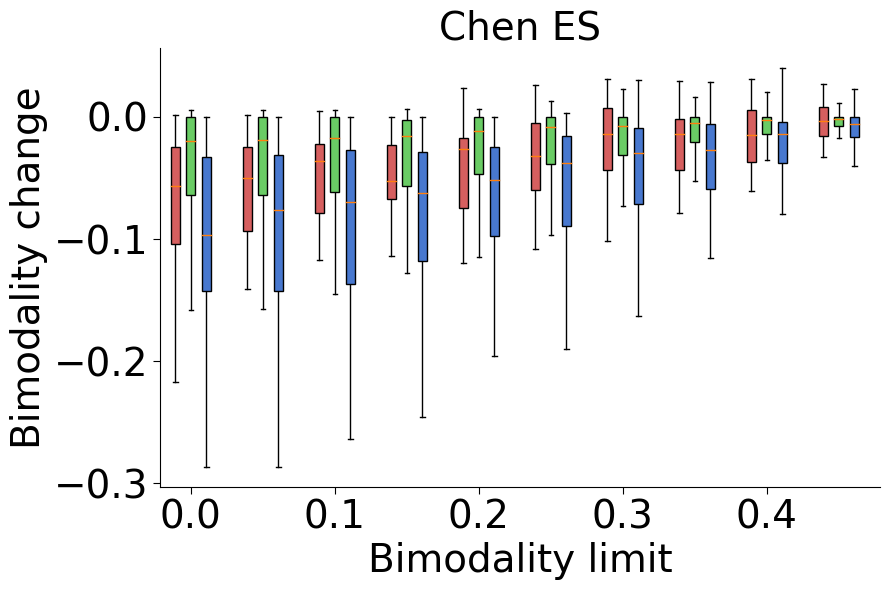

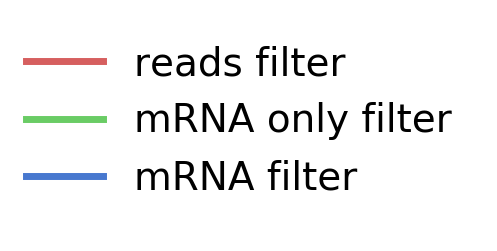

Median AUC in all exons: 0.3860795454545454

Median AUC in read selected exons: 0.2278761061946903
Change is significant with respect to all exons (adj pval = 4.6910159752205564e-14)
Change is not significant with respect to all exons (adj pval = 0.23943570901798494)

Median AUC in mRNA only selected exons: 0.30837385794282346
Change is significant with respect to all exons (adj pval = 8.564005125170228e-21)
Filtering observations does not reduce AUC significantly (adj pval = 0.10624351087938141)

Median AUC in mRNA selected exons: 0.2489495798319328
Change is significant with respect to all exons (adj pval = 1.1342192170301584e-30)
Filtering observations reduces AUC significantly (adj pval = 0.0005103596036774633)



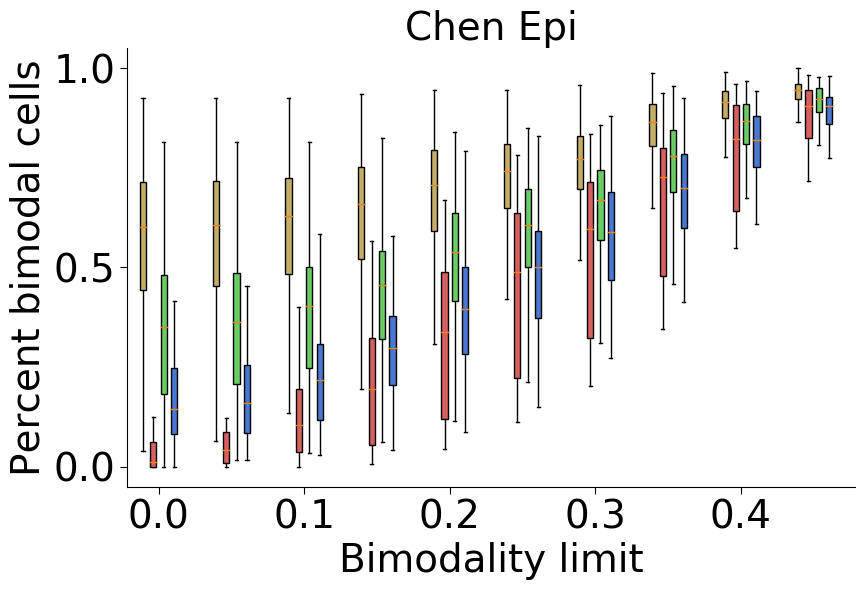

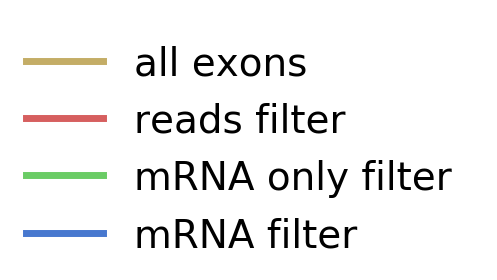

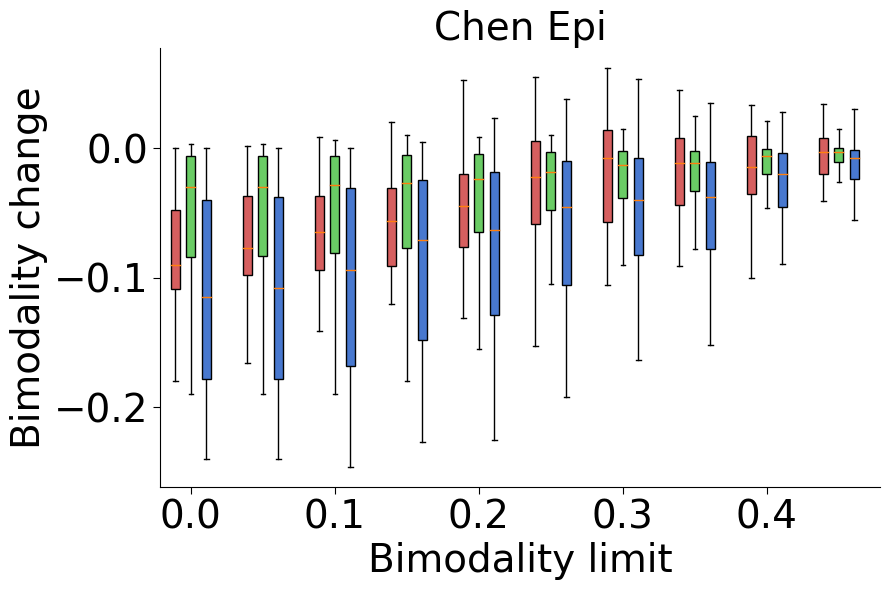

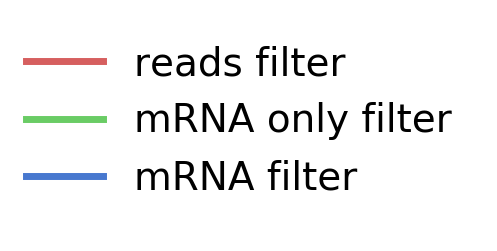

Median AUC in all exons: 0.38204622561492796

Median AUC in read selected exons: 0.2423539518900344
Change is significant with respect to all exons (adj pval = 1.6022038140306229e-16)
Change is not significant with respect to all exons (adj pval = 0.12419315439724551)

Median AUC in mRNA only selected exons: 0.31416666666666665
Change is significant with respect to all exons (adj pval = 2.4805927150351437e-27)
Filtering observations reduces AUC significantly (adj pval = 0.013128429713214644)

Median AUC in mRNA selected exons: 0.2592835950611364
Change is significant with respect to all exons (adj pval = 1.5830734175532213e-36)
Filtering observations reduces AUC significantly (adj pval = 6.79571296707332e-05)



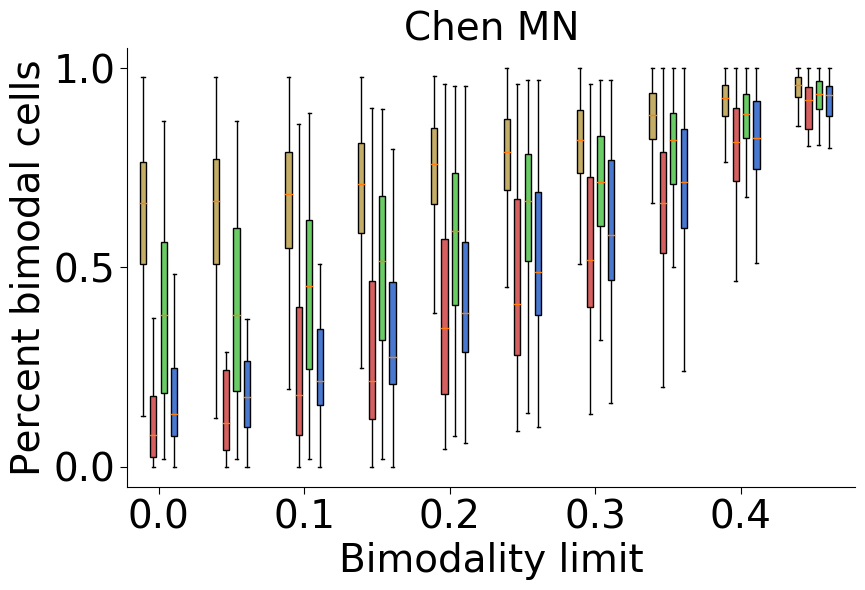

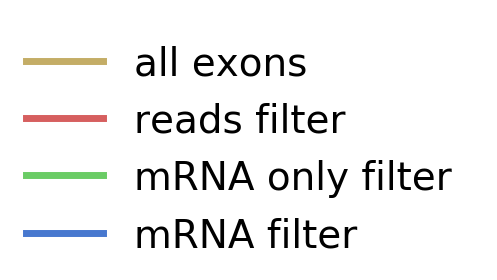

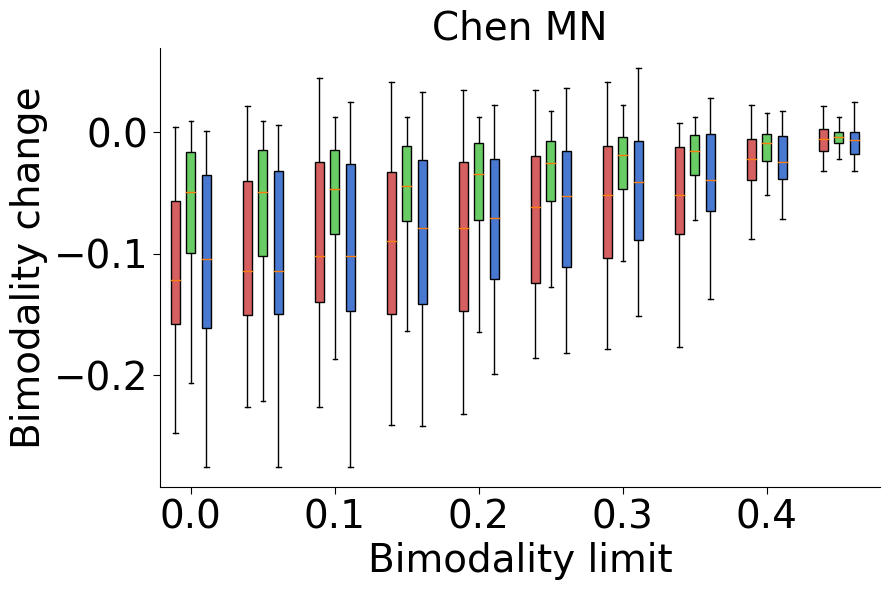

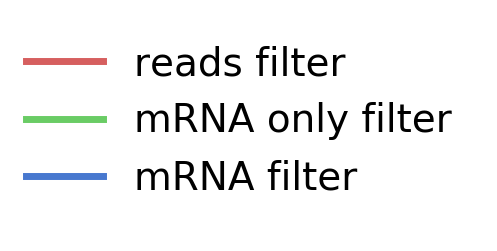

Median AUC in all exons: 0.4009259259259259

Median AUC in read selected exons: 0.225
Change is significant with respect to all exons (adj pval = 9.4525237695745e-11)
Change is not significant with respect to all exons (adj pval = 0.10495493406308913)

Median AUC in mRNA only selected exons: 0.3314814814814815
Change is significant with respect to all exons (adj pval = 6.154670207055834e-15)
Filtering observations does not reduce AUC significantly (adj pval = 0.10495493406308913)

Median AUC in mRNA selected exons: 0.26631944444444444
Change is significant with respect to all exons (adj pval = 1.031101241487717e-14)
Filtering observations does not reduce AUC significantly (adj pval = 0.10495493406308913)



In [369]:
process_bimodality(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                  'Chen ES2i')

process_bimodality(chen_PSI, chen_ES, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                  'Chen ES')

process_bimodality(chen_PSI, chen_Epi, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                  'Chen Epi')

process_bimodality(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                  'Chen MN')

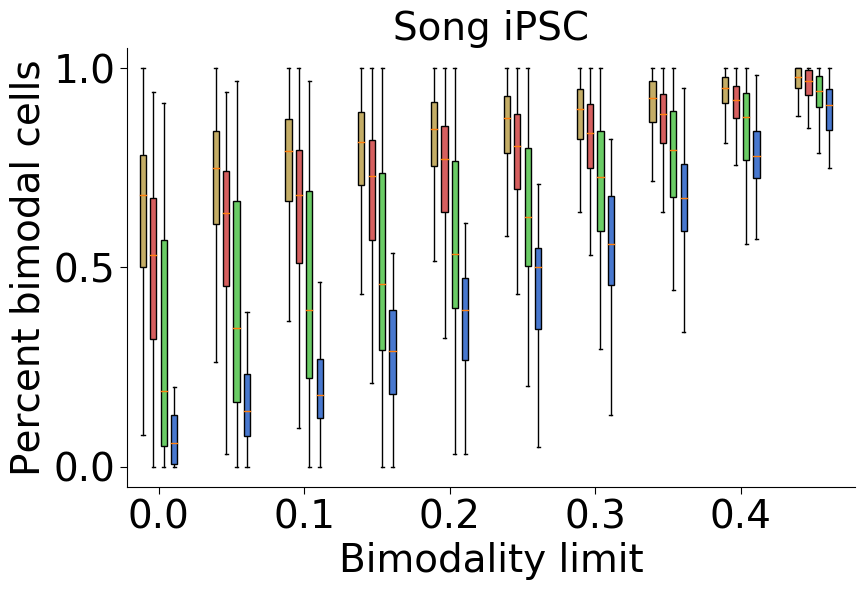

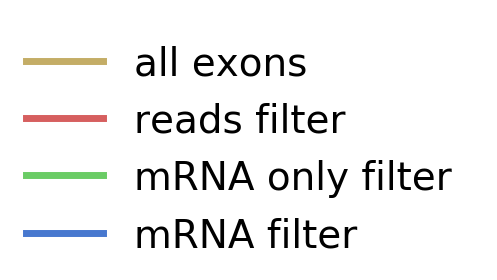

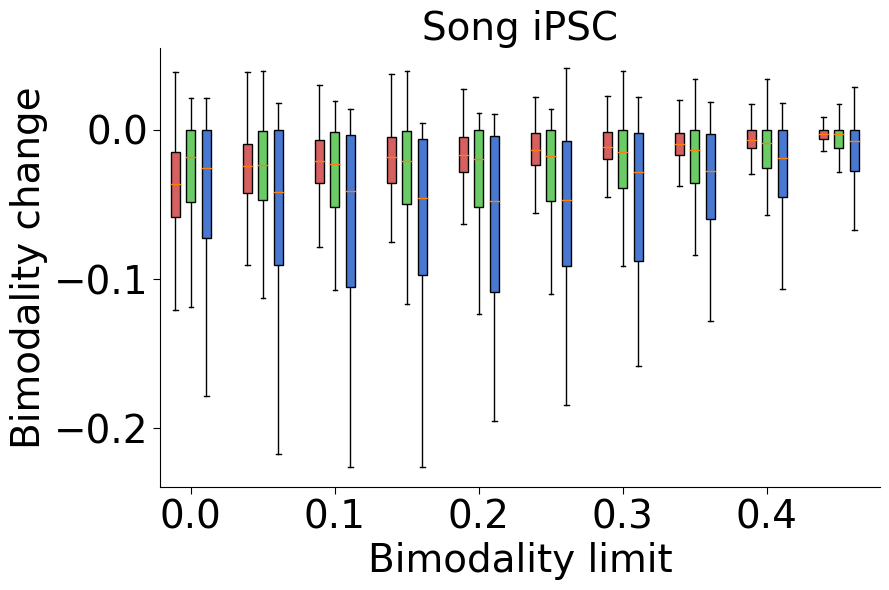

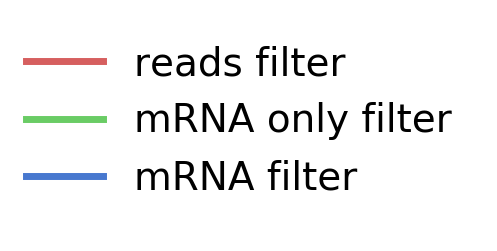

Median AUC in all exons: 0.4360435520361991

Median AUC in read selected exons: 0.40078125
Change is significant with respect to all exons (adj pval = 3.820701403188289e-17)
Filtering observations reduces AUC significantly (adj pval = 0.03548295472687173)

Median AUC in mRNA only selected exons: 0.30855562784645413
Change is significant with respect to all exons (adj pval = 3.3454218280034695e-25)
Filtering observations does not reduce AUC significantly (adj pval = 0.18767904827564164)

Median AUC in mRNA selected exons: 0.24655172413793103
Change is significant with respect to all exons (adj pval = 9.743951889843945e-29)
Filtering observations reduces AUC significantly (adj pval = 0.022266852681001544)



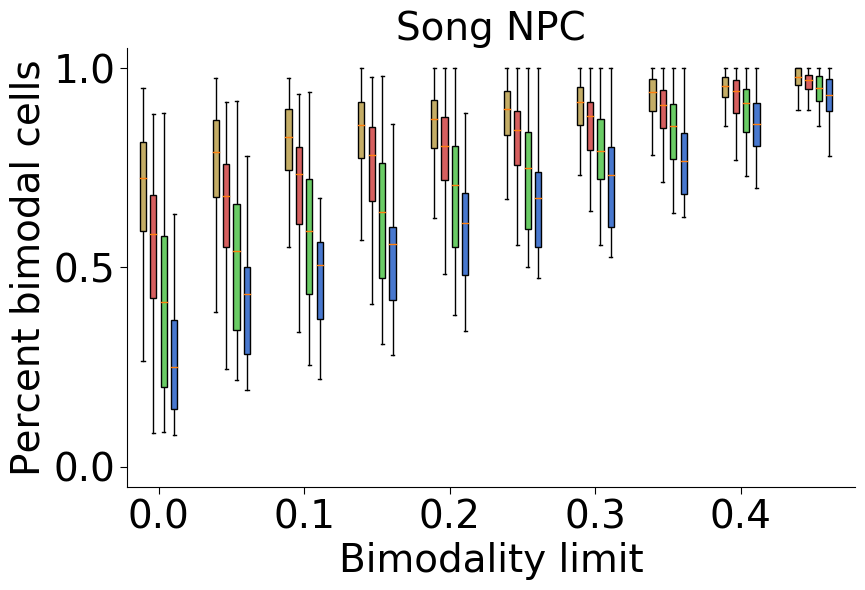

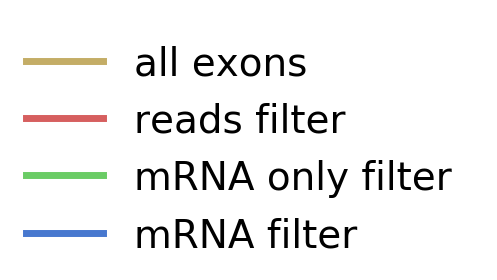

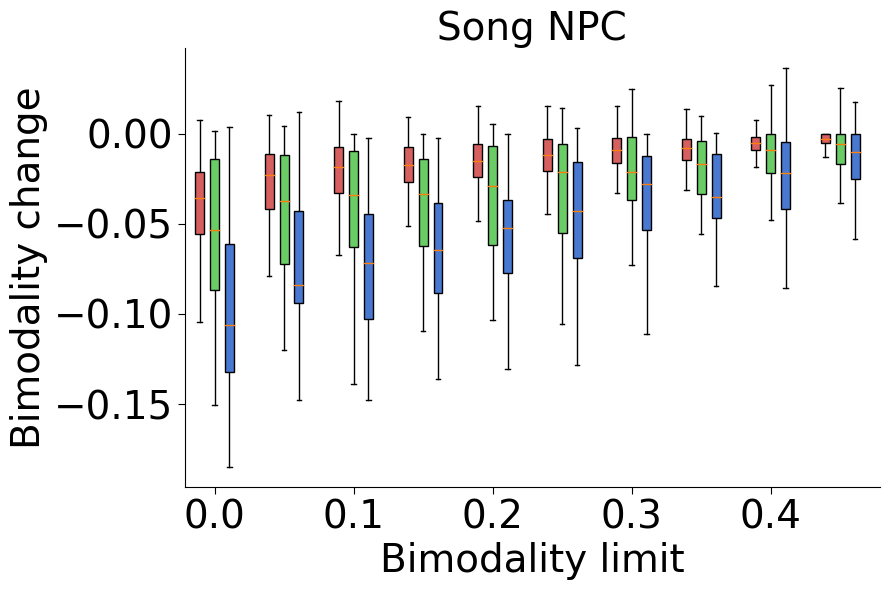

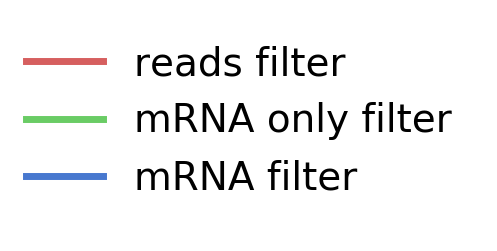

Median AUC in all exons: 0.4451138771186441

Median AUC in read selected exons: 0.41555555555555557
Change is significant with respect to all exons (adj pval = 4.172942324246099e-09)
Change is not significant with respect to all exons (adj pval = 0.20083198119036502)

Median AUC in mRNA only selected exons: 0.37554347826086953
Change is significant with respect to all exons (adj pval = 2.3405117471491235e-10)
Filtering observations does not reduce AUC significantly (adj pval = 0.2355174691076305)

Median AUC in mRNA selected exons: 0.33843808630393996
Change is significant with respect to all exons (adj pval = 3.0822175453157346e-11)
Filtering observations does not reduce AUC significantly (adj pval = 0.1131126959353592)



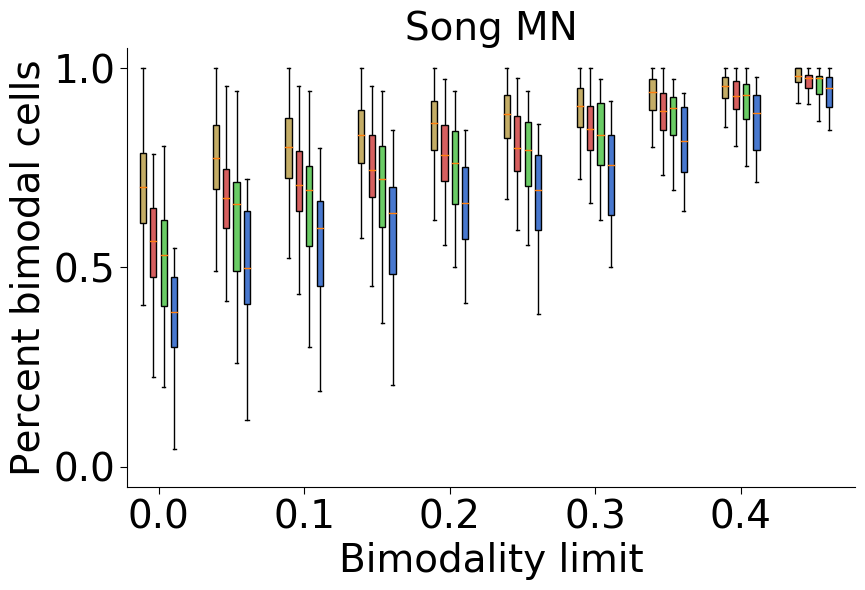

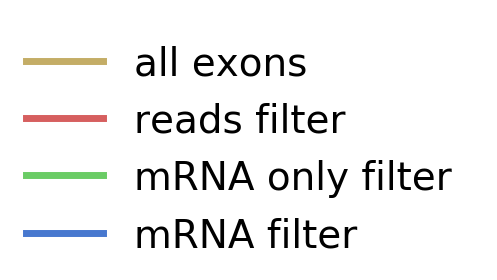

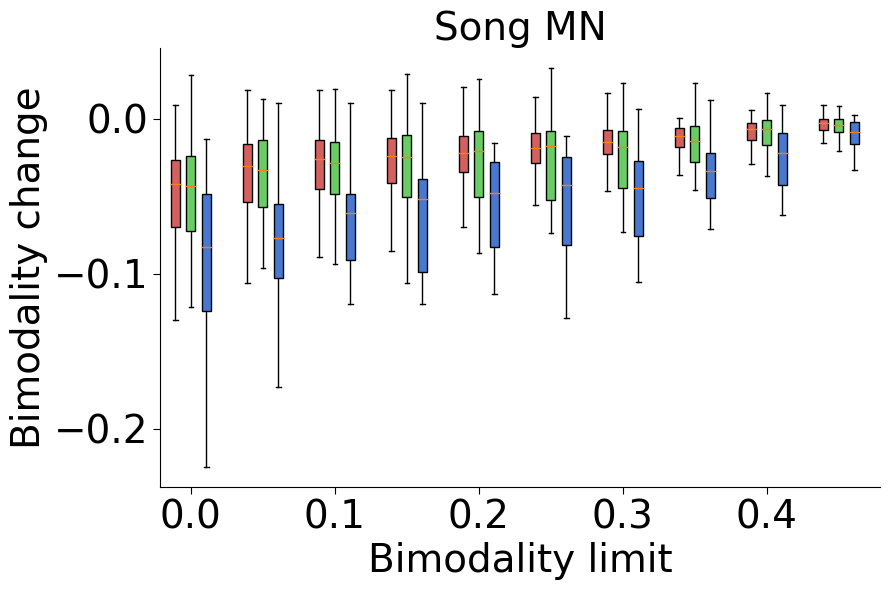

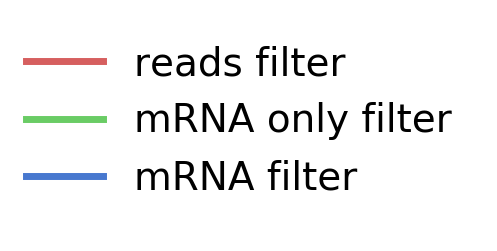

Median AUC in all exons: 0.44099154391707585

Median AUC in read selected exons: 0.4052439024390244
Change is significant with respect to all exons (adj pval = 1.0051955632560441e-08)
Change is not significant with respect to all exons (adj pval = 0.08110299085684193)

Median AUC in mRNA only selected exons: 0.3987606837606838
Change is significant with respect to all exons (adj pval = 9.827768752299085e-08)
Filtering observations does not reduce AUC significantly (adj pval = 0.22203167332295914)

Median AUC in mRNA selected exons: 0.3580142642642643
Change is significant with respect to all exons (adj pval = 6.523079486446052e-09)
Filtering observations does not reduce AUC significantly (adj pval = 0.16848132346839967)



In [370]:
process_bimodality(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab,
                  'Song iPSC')

process_bimodality(song_PSI, song_NPC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab,
                  'Song NPC')

process_bimodality(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab,
                  'Song MN')

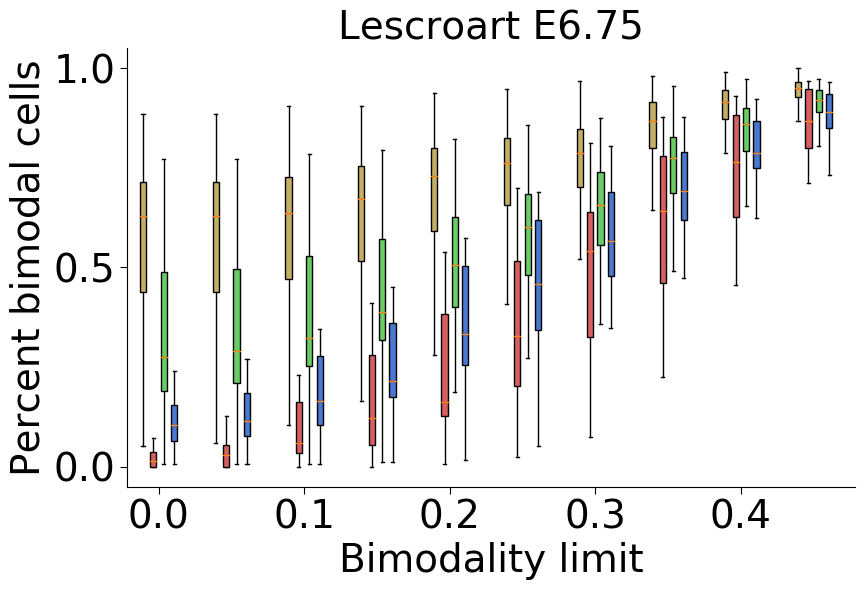

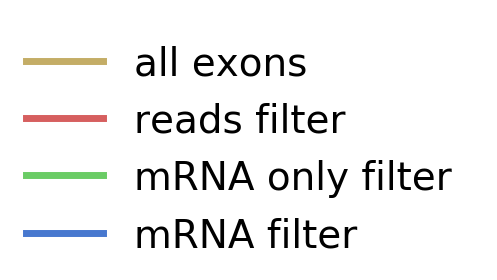

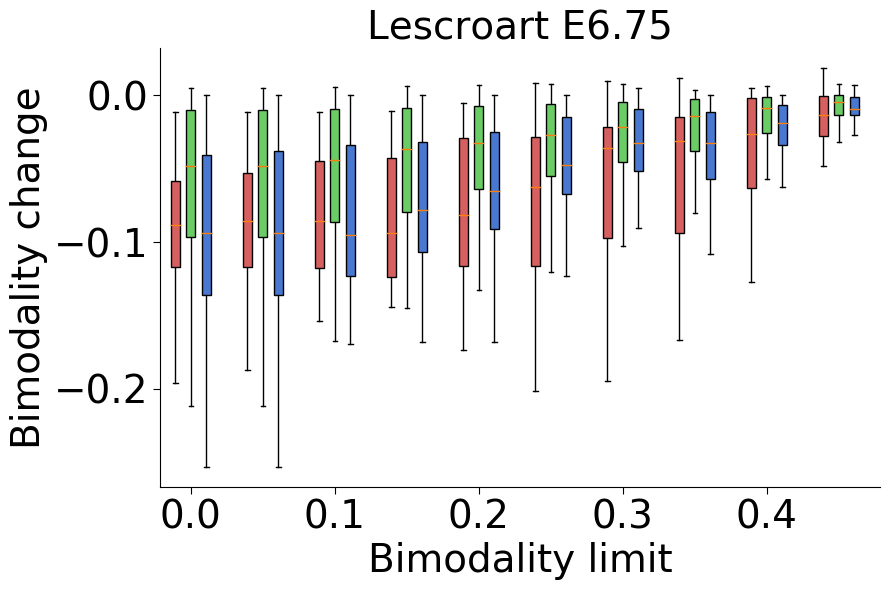

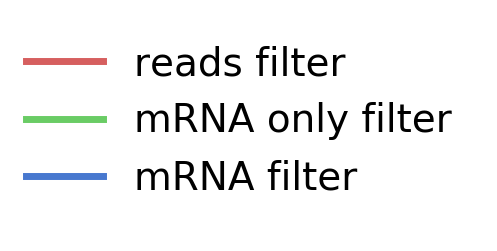

Median AUC in all exons: 0.38859784283513094

Median AUC in read selected exons: 0.21314102564102563
Change is significant with respect to all exons (adj pval = 2.239123433659191e-09)
Change is not significant with respect to all exons (adj pval = 0.17106923105635197)

Median AUC in mRNA only selected exons: 0.2964968152866242
Change is significant with respect to all exons (adj pval = 6.00578835594496e-17)
Filtering observations reduces AUC significantly (adj pval = 0.044315460797826195)

Median AUC in mRNA selected exons: 0.237
Change is significant with respect to all exons (adj pval = 1.9142554886490237e-16)
Filtering observations reduces AUC significantly (adj pval = 0.04042477418871652)



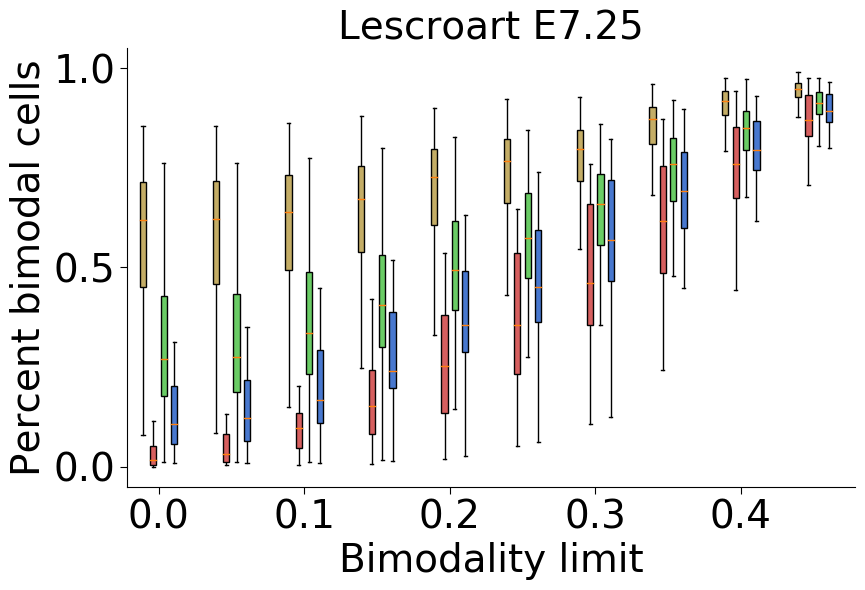

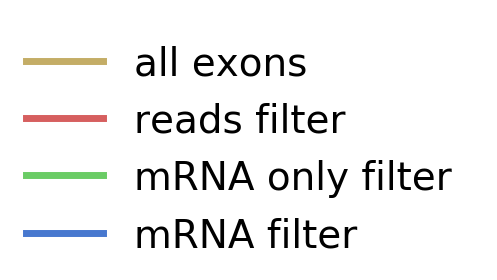

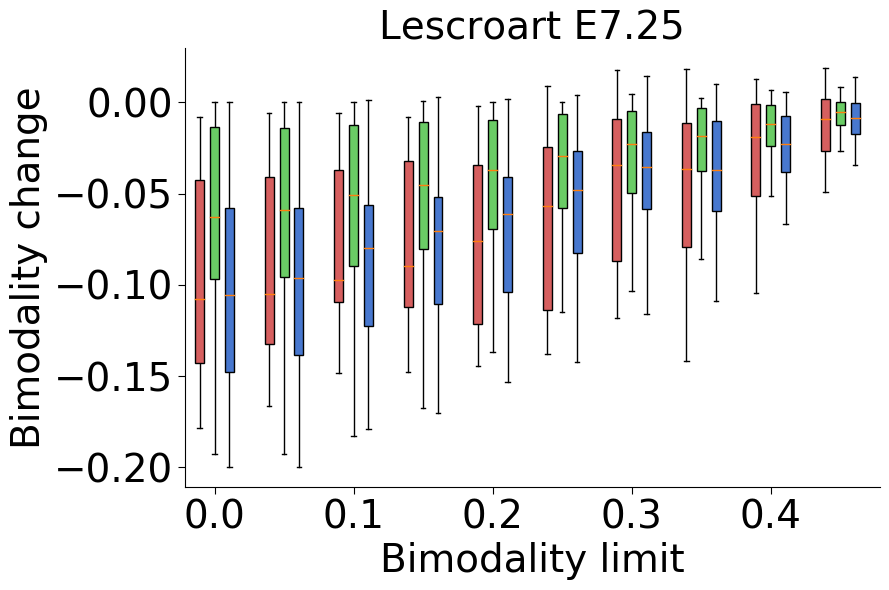

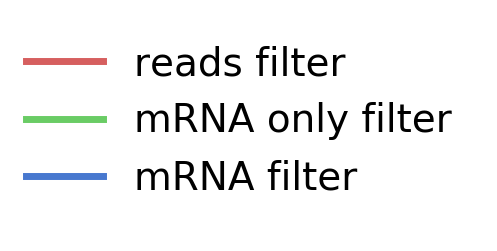

Median AUC in all exons: 0.3884444444444444

Median AUC in read selected exons: 0.20467329007199697
Change is significant with respect to all exons (adj pval = 4.4990819865151866e-11)
Change is not significant with respect to all exons (adj pval = 0.0846530330989827)

Median AUC in mRNA only selected exons: 0.2942708333333333
Change is significant with respect to all exons (adj pval = 2.2684659616924965e-18)
Filtering observations reduces AUC significantly (adj pval = 0.04588743270760388)

Median AUC in mRNA selected exons: 0.24067830365510778
Change is significant with respect to all exons (adj pval = 8.557517045756887e-17)
Filtering observations reduces AUC significantly (adj pval = 0.04588743270760388)



In [371]:
process_bimodality(lescroart_PSI, lescroart_E6, lescroart_mrna_counts, mrna_per_event_lescroart, 
                   lescroart_read_counts, lescroart_coverage_tab, 'Lescroart E6.75')

process_bimodality(lescroart_PSI, lescroart_E7, lescroart_mrna_counts, mrna_per_event_lescroart, 
                   lescroart_read_counts, lescroart_coverage_tab, 'Lescroart E7.25')

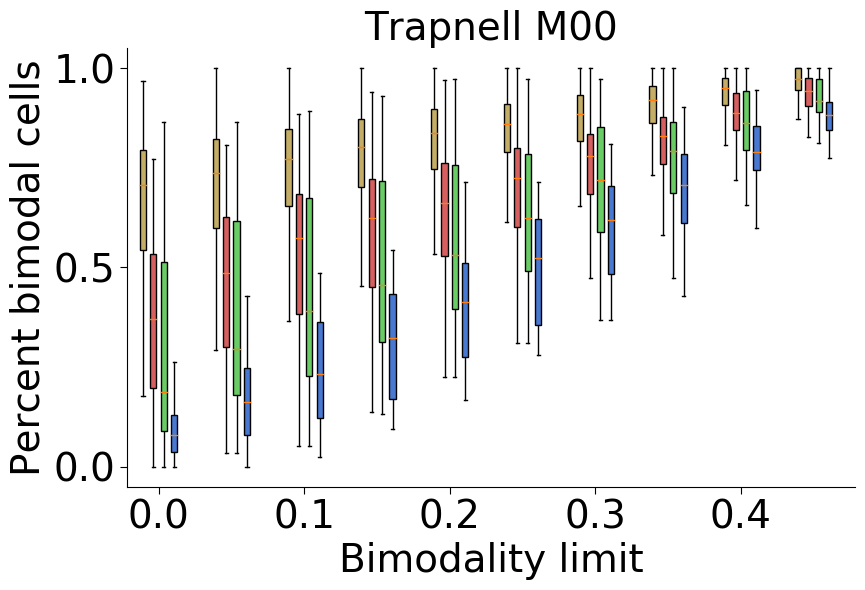

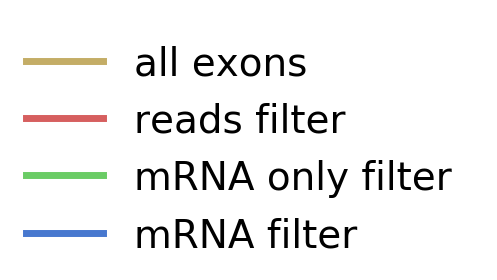

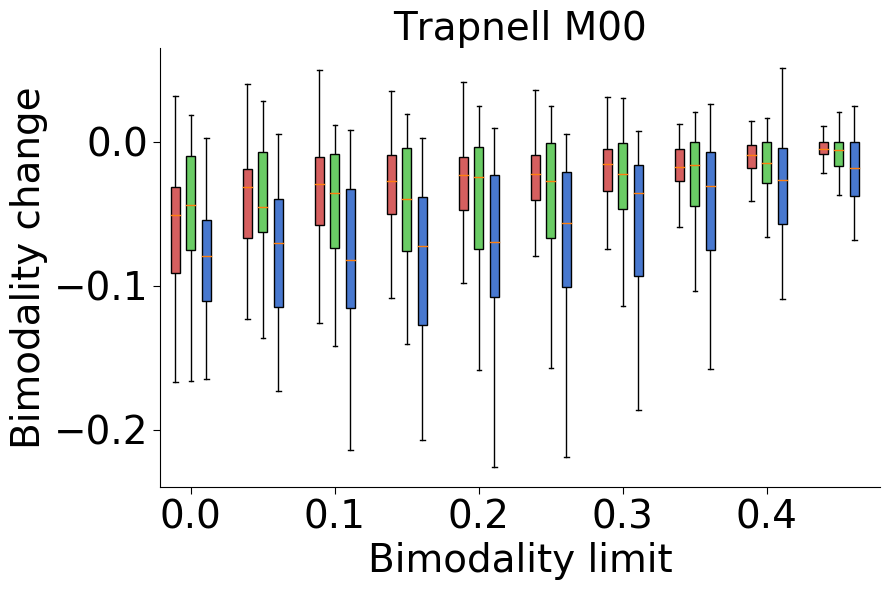

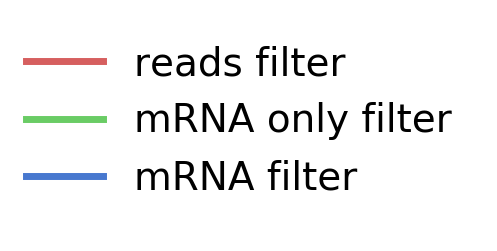

Median AUC in all exons: 0.4306189903846154

Median AUC in read selected exons: 0.3643965517241379
Change is significant with respect to all exons (adj pval = 5.226444434388957e-22)
Change is not significant with respect to all exons (adj pval = 0.08279150373189838)

Median AUC in mRNA only selected exons: 0.30830792682926833
Change is significant with respect to all exons (adj pval = 3.0055983502367337e-13)
Filtering observations does not reduce AUC significantly (adj pval = 0.22846053292672175)

Median AUC in mRNA selected exons: 0.26601874003189796
Change is significant with respect to all exons (adj pval = 2.532238860879113e-17)
Filtering observations reduces AUC significantly (adj pval = 0.026685958819416204)



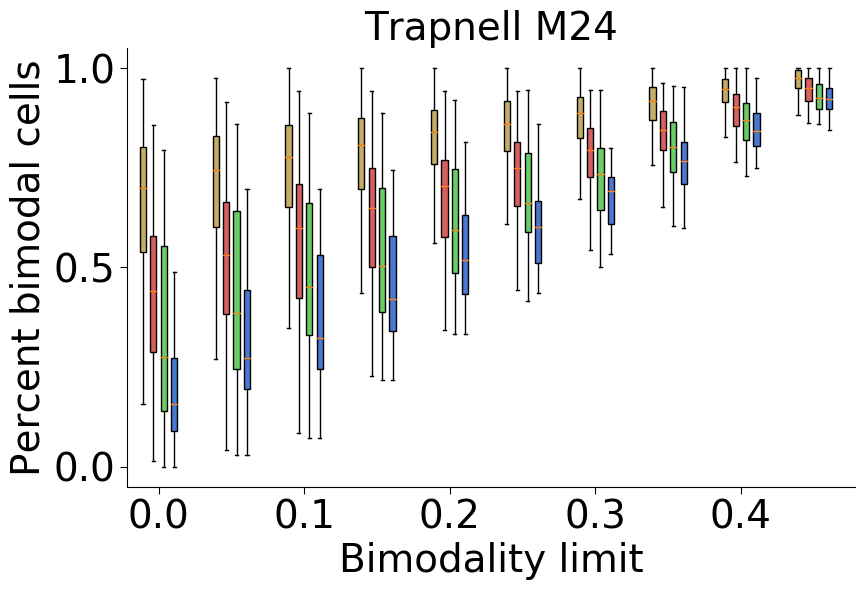

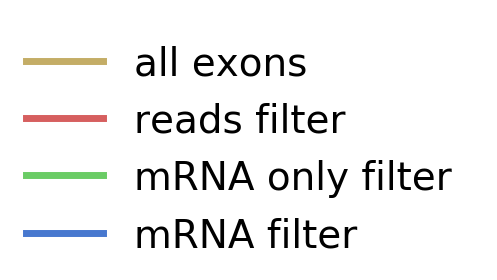

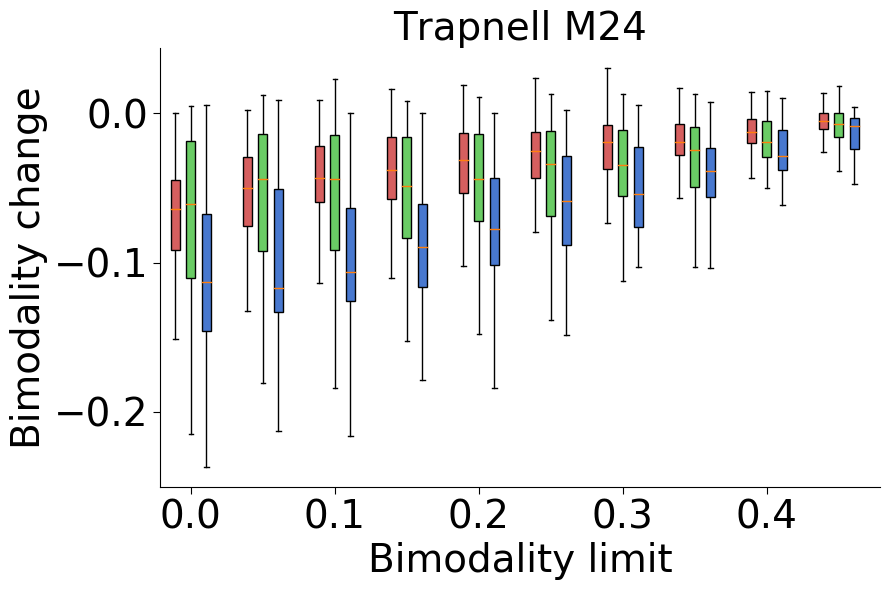

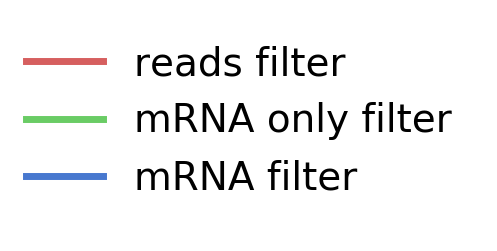

Median AUC in all exons: 0.4296020803096275

Median AUC in read selected exons: 0.37093750000000003
Change is significant with respect to all exons (adj pval = 2.577759757450974e-16)
Filtering observations reduces AUC significantly (adj pval = 0.04789146121877699)

Median AUC in mRNA only selected exons: 0.32588141025641026
Change is significant with respect to all exons (adj pval = 1.0351262737267463e-13)
Filtering observations does not reduce AUC significantly (adj pval = 0.12526181195564964)

Median AUC in mRNA selected exons: 0.29632664506480555
Change is significant with respect to all exons (adj pval = 3.700129660106547e-14)
Filtering observations reduces AUC significantly (adj pval = 0.024923056472155265)



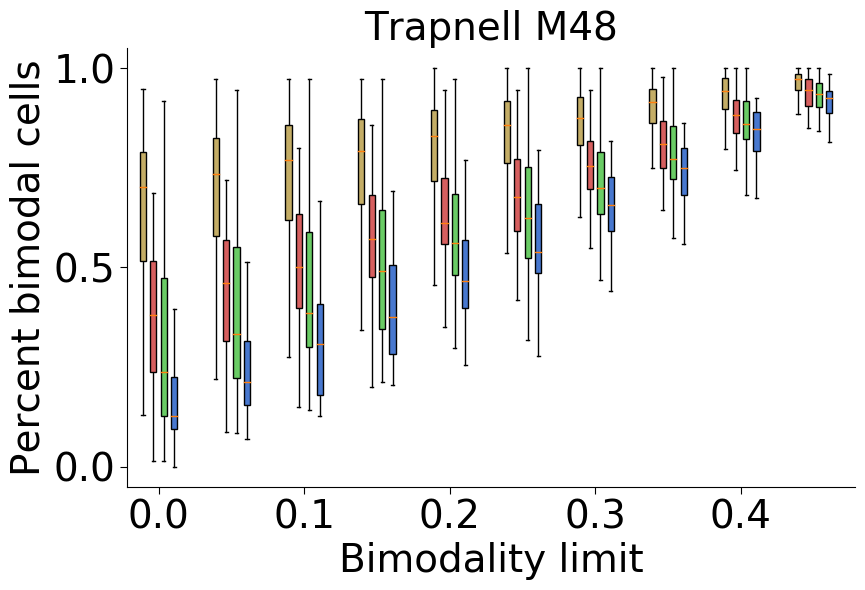

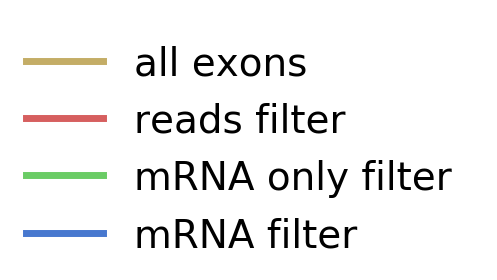

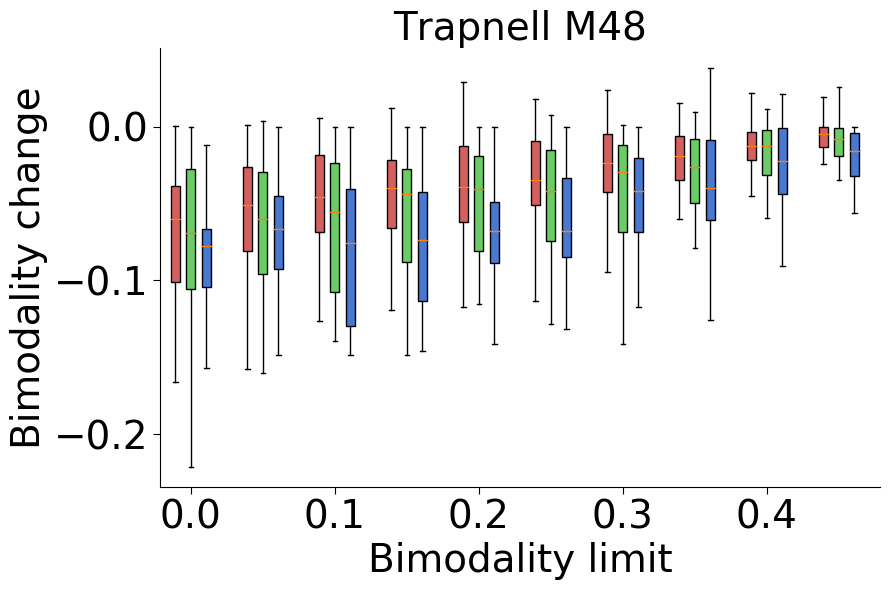

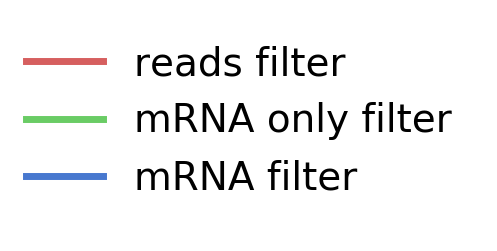

Median AUC in all exons: 0.42500000000000004

Median AUC in read selected exons: 0.34375
Change is significant with respect to all exons (adj pval = 2.391443309257687e-16)
Filtering observations reduces AUC significantly (adj pval = 0.03680916649471492)

Median AUC in mRNA only selected exons: 0.3157894736842105
Change is significant with respect to all exons (adj pval = 6.9993078007432754e-12)
Filtering observations does not reduce AUC significantly (adj pval = 0.053024318464473495)

Median AUC in mRNA selected exons: 0.27649999999999997
Change is significant with respect to all exons (adj pval = 9.405378368599947e-12)
Filtering observations reduces AUC significantly (adj pval = 0.03680916649471492)



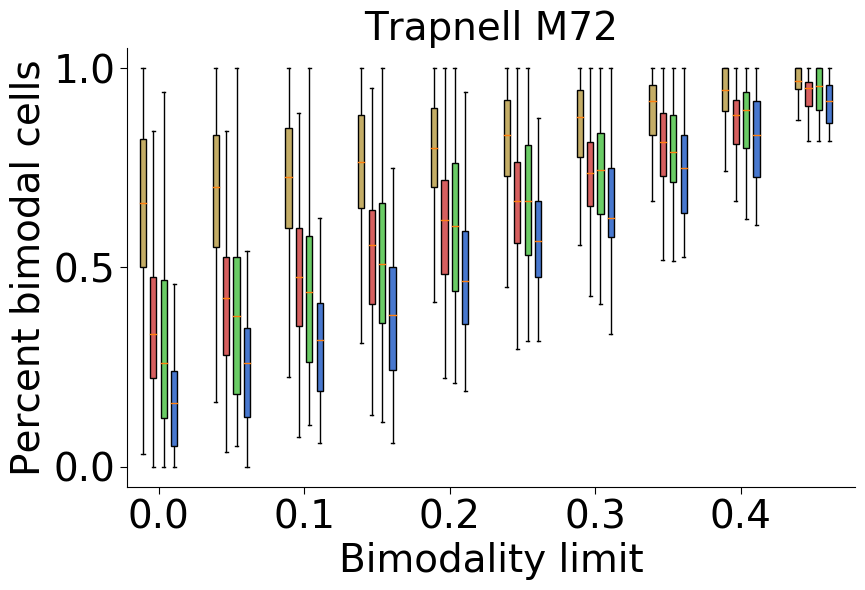

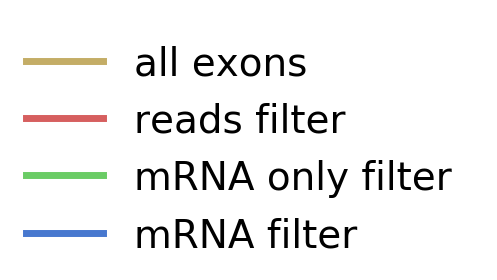

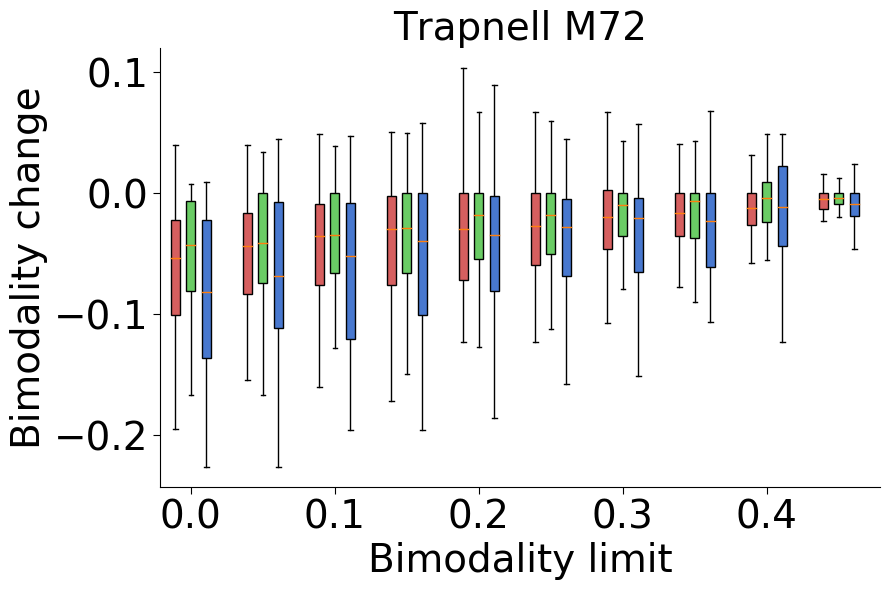

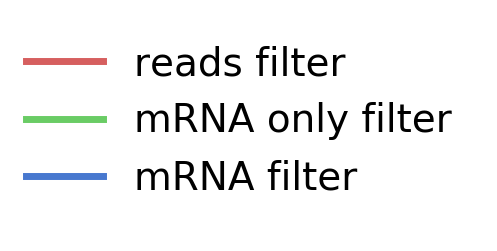

Median AUC in all exons: 0.4207427536231884

Median AUC in read selected exons: 0.3386363636363636
Change is significant with respect to all exons (adj pval = 4.038329785203048e-18)
Change is not significant with respect to all exons (adj pval = 0.0939520176337089)

Median AUC in mRNA only selected exons: 0.3371710526315789
Change is significant with respect to all exons (adj pval = 2.690381843834633e-10)
Filtering observations does not reduce AUC significantly (adj pval = 0.3930506712659938)

Median AUC in mRNA selected exons: 0.2770833333333333
Change is significant with respect to all exons (adj pval = 3.761974574225012e-15)
Filtering observations does not reduce AUC significantly (adj pval = 0.18994939501384356)



In [372]:
process_bimodality(trapnell_PSI, trapnell_M00, trapnell_mrna_counts, mrna_per_event_trapnell, 
                   trapnell_read_counts, trapnell_coverage_tab, 'Trapnell M00')

process_bimodality(trapnell_PSI, trapnell_M24, trapnell_mrna_counts, mrna_per_event_trapnell, 
                   trapnell_read_counts, trapnell_coverage_tab, 'Trapnell M24')

process_bimodality(trapnell_PSI, trapnell_M48, trapnell_mrna_counts, mrna_per_event_trapnell, 
                   trapnell_read_counts, trapnell_coverage_tab, 'Trapnell M48')

process_bimodality(trapnell_PSI, trapnell_M72, trapnell_mrna_counts, mrna_per_event_trapnell, 
                   trapnell_read_counts, trapnell_coverage_tab, 'Trapnell M72')

### ANOVA tests

### Figure 3j: Filtered observations for some selected exons

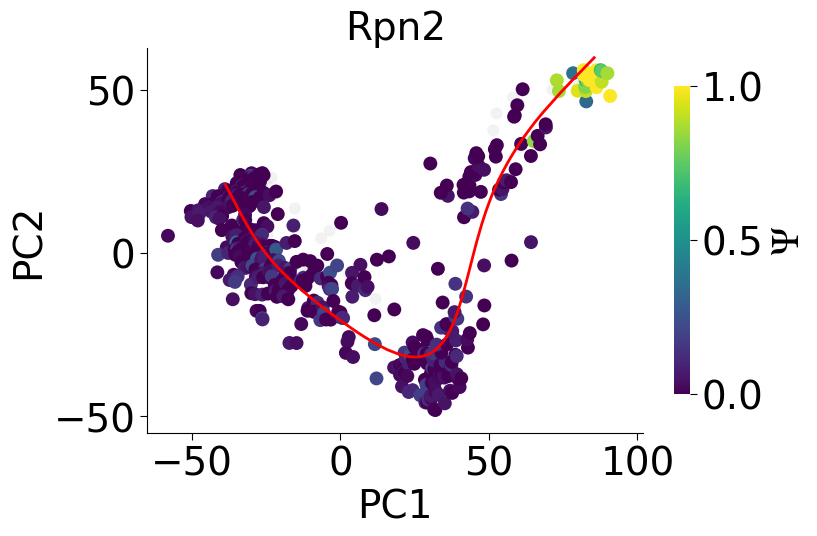

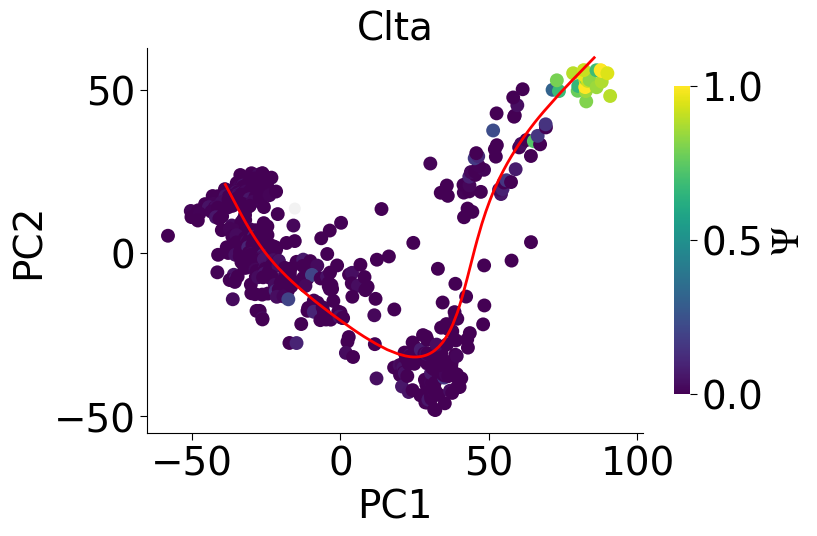

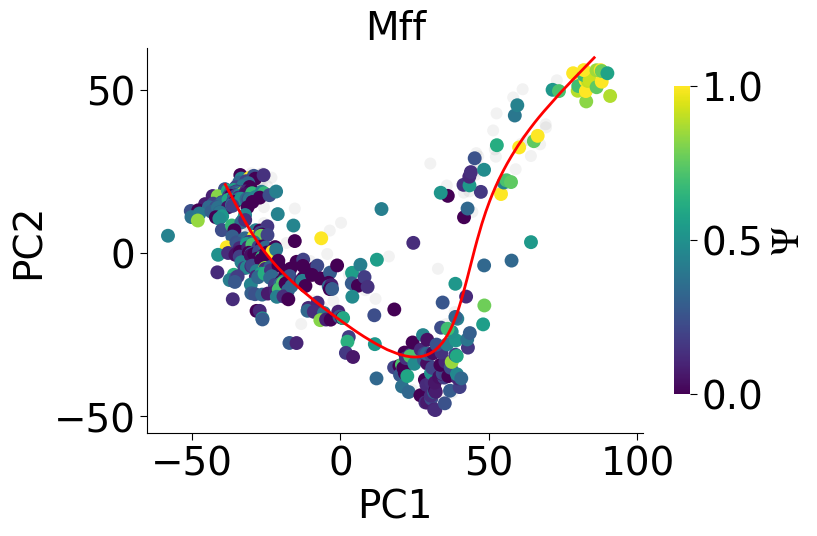

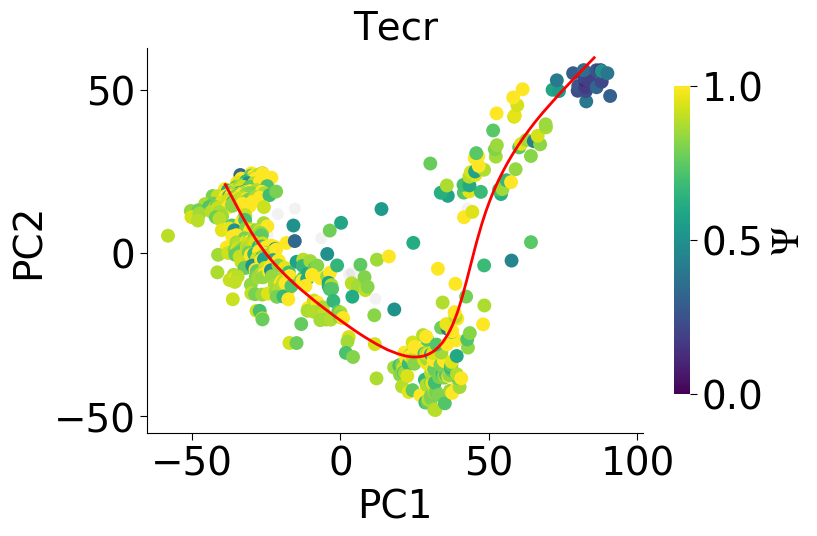

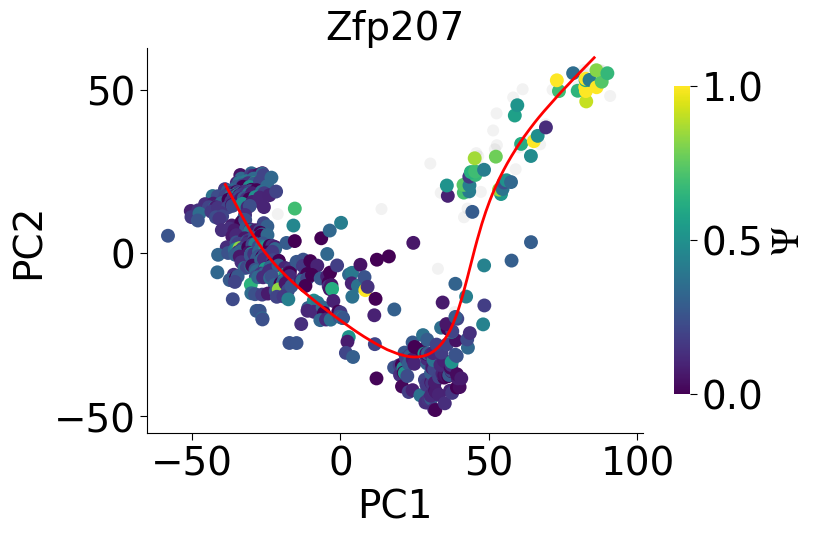

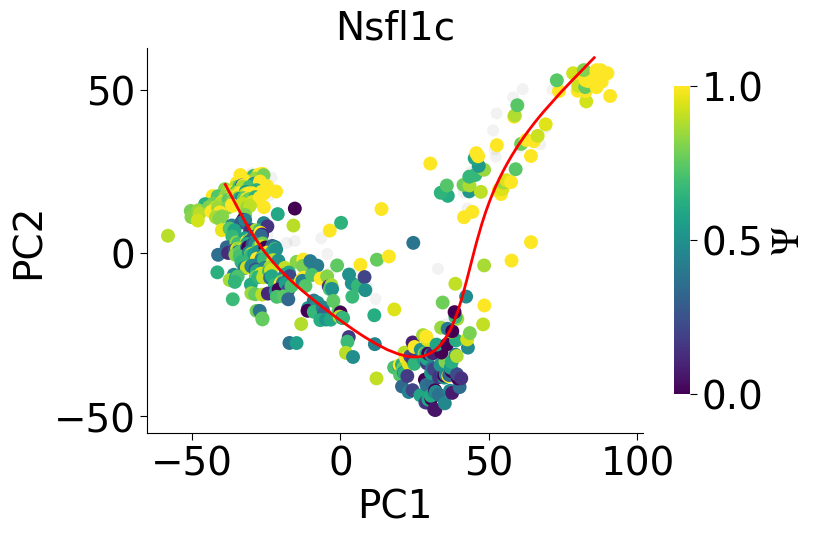

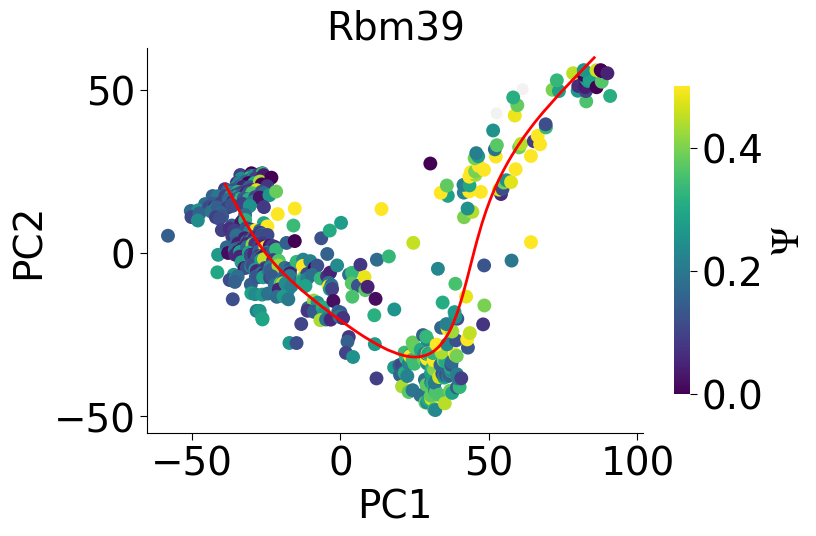

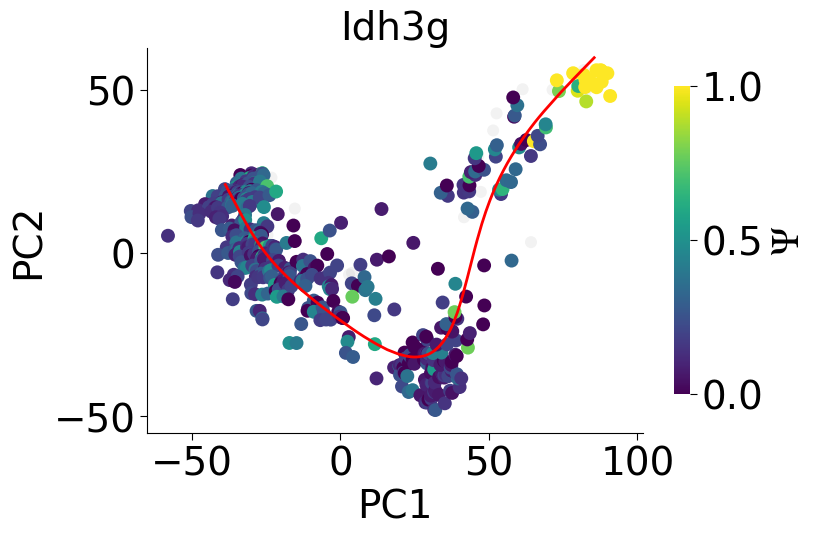

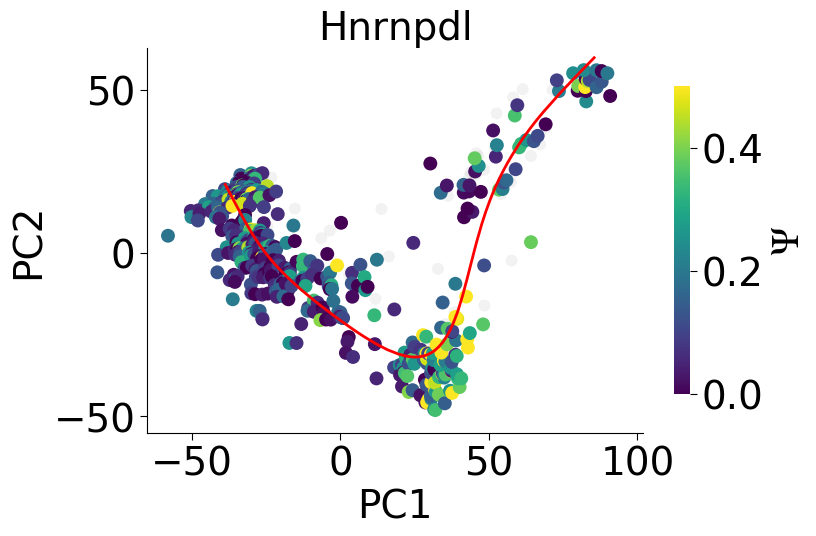

In [373]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Rpn2_1', 10, plot_dir = 'plots_review/figure3/events/', filter_cells=True)
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Clta_4', 10, plot_dir = 'plots_review/figure3/events/', filter_cells=True)
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Mff_3', 10, plot_dir = 'plots_review/figure3/events/', filter_cells=True)
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Tecr_4', 10, plot_dir = 'plots_review/figure3/events/', filter_cells=True)
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Zfp207_1', 10, plot_dir = 'plots_review/figure3/events/', filter_cells=True)
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Nsfl1c_2', 10, plot_dir = 'plots_review/figure3/events/', filter_cells=True)
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Rbm39_nmdSE_2', 10, plot_dir = 'plots_review/figure3/events/', vmax=0.5, filter_cells=True)
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Idh3g_1', 10, plot_dir = 'plots_review/figure3/events/', filter_cells=True)
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Hnrnpdl_nmdSE_1', 10, plot_dir = 'plots_review/figure3/events/', vmax=0.5, filter_cells=True)


In [264]:
len(chen_filtered[0].loc['Mff_3'].dropna())

359

In [265]:
len(chen_PSI.loc['Mff_3'].dropna())

469

In [267]:
chen_pca_clust.head()

PC1        PC2     line_1     line_2  pseudotime cell_type  \
cell                                                                           
SRR2727109 -33.702108  23.964920 -38.753616  21.046449    0.000000      ES2i   
SRR2727120 -43.011465  17.517977 -38.290802  20.245375    0.925158      ES2i   
SRR2727088 -33.375586  22.861021 -38.193695  20.077301    1.119268      ES2i   
SRR2727094 -38.878253  19.630433 -38.171450  20.038798    1.163735      ES2i   
SRR2727139 -50.383929  12.942815 -38.154103  20.008775    1.198409      ES2i   

               sex  AC  
cell                    
SRR2727109  female   0  
SRR2727120  female   0  
SRR2727088    male   0  
SRR2727094    male   0  
SRR2727139  female   0

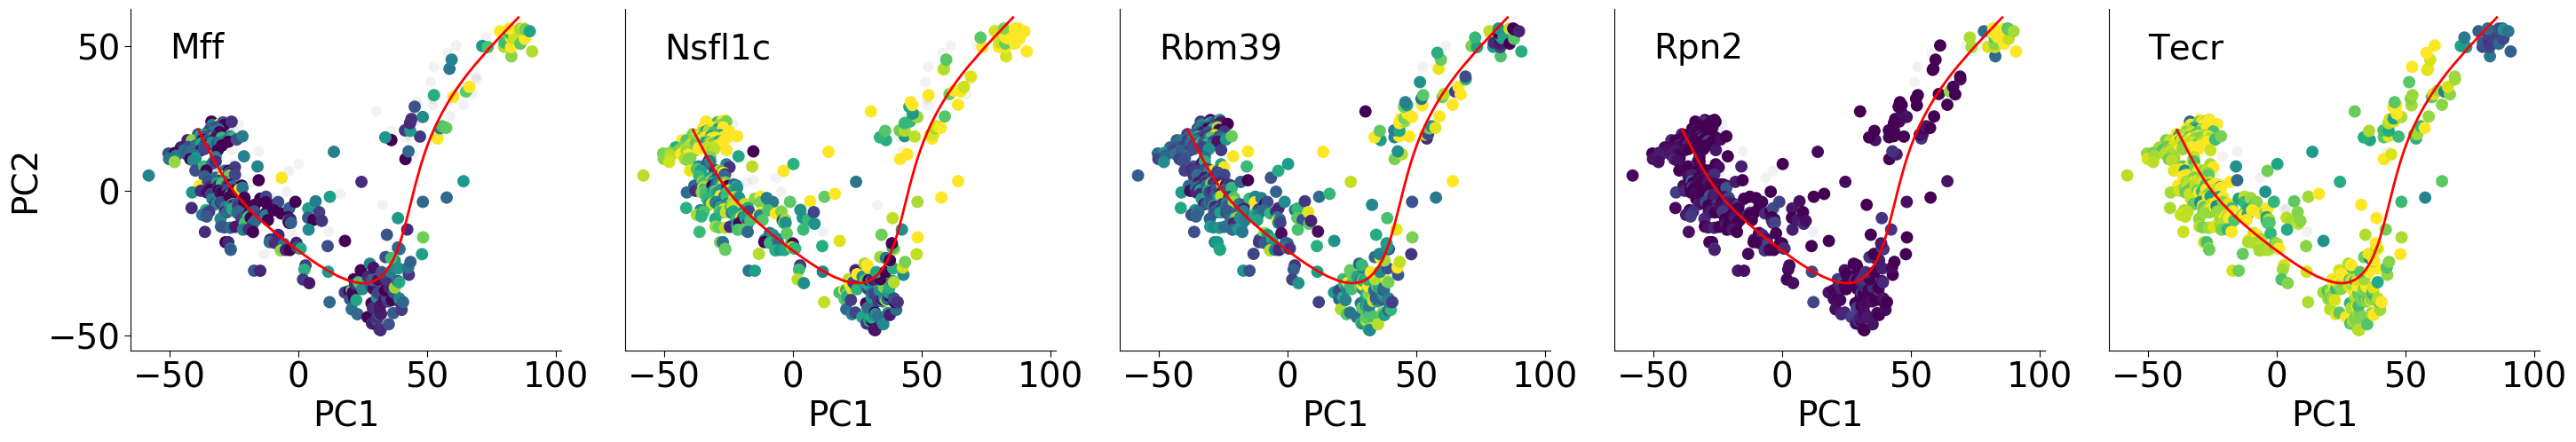

In [374]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



# im1 = ax1.imshow([[1, 2], [2, 3]])
# fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[1, 2, 3])
# axins1.xaxis.set_ticks_position("bottom")

# axins = inset_axes(ax2,
#                    width="5%",  # width = 5% of parent_bbox width
#                    height="50%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.05, 0., 1, 1),
#                    bbox_transform=ax2.transAxes,
#                    borderpad=0,
#                    )

# # Controlling the placement of the inset axes is basically same as that
# # of the legend.  you may want to play with the borderpad value and
# # the bbox_to_anchor coordinate.

# im = ax2.imshow([[1, 2], [2, 3]])
# fig.colorbar(im, cax=axins, ticks=[1, 2, 3])



def plot_exon(ax, PSI_tab, pca_tab, event, vmin=0, vmax=1):
    
    
#     cbaxes = fig.add_axes([0.8, 0.1, 0.03, 0.8]) 
# cb = plt.colorbar(ax1, cax = cbaxes)  
    
#     axins1 = inset_axes(ax,
#                     width="5%",  # width = 50% of parent_bbox width
#                     height="40%",  # height : 5%
#                     loc='right')
    
    ax.scatter(pca_tab.PC1, pca_tab.PC2, c='gray', s=75, edgecolors='none', alpha=0.1)
    sc = ax.scatter(pca_tab.PC1, pca_tab.PC2, 
                c=PSI_tab.loc[event], s=100, edgecolors='none', vmin=vmin, vmax=vmax, cmap=cm.viridis)
    
    
    ax.tick_params(labelsize=28, length=5)
#     cb = plt.colorbar(sc, shrink = 0.8, ax=ax)
#     cb.set_label(label='$\Psi$',size=28)
#     cb.ax.tick_params(labelsize=28, length=5)
#     cb.outline.set_visible(False)

#     cb = fig.colorbar(sc, cax=axins1, ticks=[0, 0.5, 1])
# #     cb.set_label(label='$\Psi$',size=28)
#     cb.ax.tick_params(labelsize=28, length=5)
#     cb.outline.set_visible(False)
#     axins1.xaxis.set_ticks_position("bottom")
    
#     cb.outline.set_visible(False)
    
    
    ax.plot(pca_tab.line_1, pca_tab.line_2, c='red',linewidth=2)
    
    ax.set_xlabel('PC1', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.set_xlim([-65, 102])
    ax.set_ylim([-55, 63])
    

    
 
    
figsize(35, 5)
fig = plt.figure()

# fig.suptitle('p-values of anova test', fontsize=24)

gs = GridSpec(1,5)
gs.update(wspace=0.15, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])
ax_5 = fig.add_subplot(gs[0,4])
# ax_6 = fig.add_subplot(gs[0,5])

# ax_1.set_ylim((-0.05,1.05))
# ax_2.set_ylim((-0.05,1.05))
# ax_3.set_ylim((-0.05,1.05))
# ax_4.set_ylim((-0.05,1.05))

plot_exon(ax_1, chen_filtered[0], chen_pca_clust, 'Mff_3', vmin=0, vmax=1)
plot_exon(ax_2, chen_filtered[0], chen_pca_clust, 'Nsfl1c_2', vmin=0, vmax=1)
plot_exon(ax_3, chen_filtered[0], chen_pca_clust, 'Rbm39_nmdSE_2', vmin=0, vmax=0.5)
plot_exon(ax_4, chen_filtered[0], chen_pca_clust, 'Rpn2_1', vmin=0, vmax=1)
plot_exon(ax_5, chen_filtered[0], chen_pca_clust, 'Tecr_4', vmin=0, vmax=1)
# plot_exon(ax_6, chen_filtered[0], chen_pca_clust, 'Zfp207_1', vmin=0, vmax=1)


plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
plt.setp(ax_5.get_yticklabels(), visible=False)
# plt.setp(ax_6.get_yticklabels(), visible=False)

ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')
ax_5.yaxis.set_ticks_position('none')
# ax_6.yaxis.set_ticks_position('none')

ax_1.text(-50, 55, 'Mff', fontsize=28, verticalalignment='top')
ax_2.text(-50, 55, 'Nsfl1c', fontsize=28, verticalalignment='top')
ax_3.text(-50, 55, 'Rbm39', fontsize=28, verticalalignment='top')
ax_4.text(-50, 55, 'Rpn2', fontsize=28, verticalalignment='top')
ax_5.text(-50, 55, 'Tecr', fontsize=28, verticalalignment='top')
# ax_6.text(-50, 55, 'Zfp207', fontsize=28, verticalalignment='top')
# ax_2.text(0.05, 1, 'Lescroart', fontsize=24, verticalalignment='top')
# ax_3.text(0.05, 1, 'Trapnell', fontsize=24, verticalalignment='top')
# ax_4.text(0.05, 1, 'Song', fontsize=24, verticalalignment='top')

# ax_3.set_xticks([0, 0.5, 1], ['0', '0.5', '1'])
            
ax_1.set_ylabel('PC2', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/events/examples.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/events/examples.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/events/examples.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




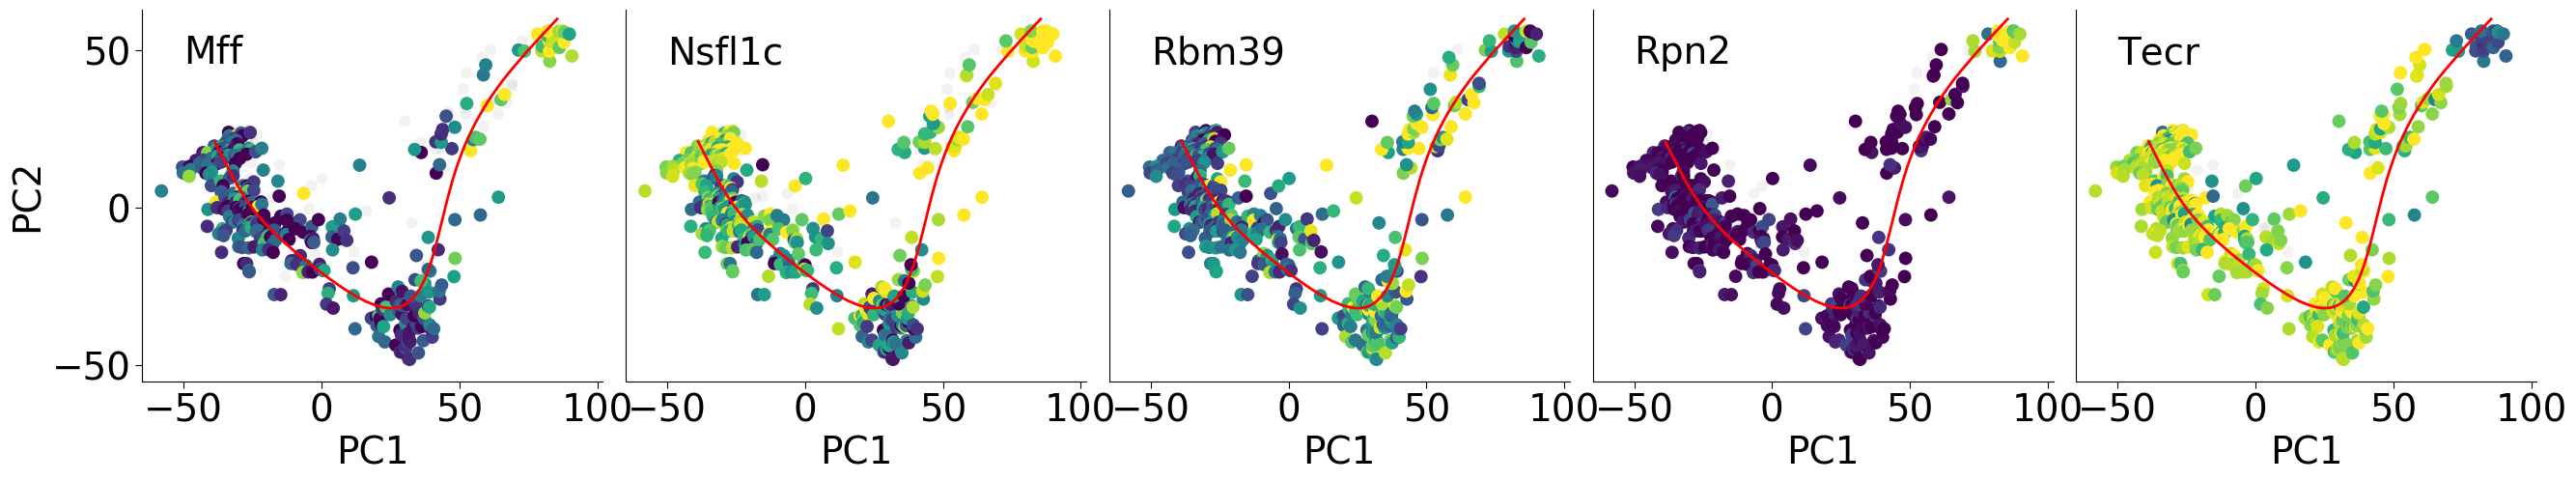

In [375]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



# im1 = ax1.imshow([[1, 2], [2, 3]])
# fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[1, 2, 3])
# axins1.xaxis.set_ticks_position("bottom")

# axins = inset_axes(ax2,
#                    width="5%",  # width = 5% of parent_bbox width
#                    height="50%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.05, 0., 1, 1),
#                    bbox_transform=ax2.transAxes,
#                    borderpad=0,
#                    )

# # Controlling the placement of the inset axes is basically same as that
# # of the legend.  you may want to play with the borderpad value and
# # the bbox_to_anchor coordinate.

# im = ax2.imshow([[1, 2], [2, 3]])
# fig.colorbar(im, cax=axins, ticks=[1, 2, 3])



def plot_exon(ax, PSI_tab, pca_tab, event, vmin=0, vmax=1):
    
    
#     cbaxes = fig.add_axes([0.8, 0.1, 0.03, 0.8]) 
# cb = plt.colorbar(ax1, cax = cbaxes)  
    
#     axins1 = inset_axes(ax,
#                     width="5%",  # width = 50% of parent_bbox width
#                     height="40%",  # height : 5%
#                     loc='right')
    
    ax.scatter(pca_tab.PC1, pca_tab.PC2, c='gray', s=75, edgecolors='none', alpha=0.1)
    sc = ax.scatter(pca_tab.PC1, pca_tab.PC2, 
                c=PSI_tab.loc[event], s=100, edgecolors='none', vmin=vmin, vmax=vmax, cmap=cm.viridis)
    
    
    ax.tick_params(labelsize=28, length=5)
#     cb = plt.colorbar(sc, shrink = 0.8, ax=ax)
#     cb.set_label(label='$\Psi$',size=28)
#     cb.ax.tick_params(labelsize=28, length=5)
#     cb.outline.set_visible(False)

#     cb = fig.colorbar(sc, cax=axins1, ticks=[0, 0.5, 1])
# #     cb.set_label(label='$\Psi$',size=28)
#     cb.ax.tick_params(labelsize=28, length=5)
#     cb.outline.set_visible(False)
#     axins1.xaxis.set_ticks_position("bottom")
    
#     cb.outline.set_visible(False)
    
    
    ax.plot(pca_tab.line_1, pca_tab.line_2, c='red',linewidth=2)
    
    ax.set_xlabel('PC1', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.set_xlim([-65, 102])
    ax.set_ylim([-55, 63])
    

    
 
    
figsize(32, 5)
fig = plt.figure()

# fig.suptitle('p-values of anova test', fontsize=24)

gs = GridSpec(1,5)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])
ax_5 = fig.add_subplot(gs[0,4])
# ax_6 = fig.add_subplot(gs[0,5])

# ax_1.set_ylim((-0.05,1.05))
# ax_2.set_ylim((-0.05,1.05))
# ax_3.set_ylim((-0.05,1.05))
# ax_4.set_ylim((-0.05,1.05))

plot_exon(ax_1, chen_filtered[0], chen_pca_clust, 'Mff_3', vmin=0, vmax=1)
plot_exon(ax_2, chen_filtered[0], chen_pca_clust, 'Nsfl1c_2', vmin=0, vmax=1)
plot_exon(ax_3, chen_filtered[0], chen_pca_clust, 'Rbm39_nmdSE_2', vmin=0, vmax=0.5)
plot_exon(ax_4, chen_filtered[0], chen_pca_clust, 'Rpn2_1', vmin=0, vmax=1)
plot_exon(ax_5, chen_filtered[0], chen_pca_clust, 'Tecr_4', vmin=0, vmax=1)
# plot_exon(ax_6, chen_filtered[0], chen_pca_clust, 'Zfp207_1', vmin=0, vmax=1)


plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
plt.setp(ax_5.get_yticklabels(), visible=False)
# plt.setp(ax_6.get_yticklabels(), visible=False)

ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')
ax_5.yaxis.set_ticks_position('none')
# ax_6.yaxis.set_ticks_position('none')

ax_1.text(-50, 55, 'Mff', fontsize=28, verticalalignment='top')
ax_2.text(-50, 55, 'Nsfl1c', fontsize=28, verticalalignment='top')
ax_3.text(-50, 55, 'Rbm39', fontsize=28, verticalalignment='top')
ax_4.text(-50, 55, 'Rpn2', fontsize=28, verticalalignment='top')
ax_5.text(-50, 55, 'Tecr', fontsize=28, verticalalignment='top')
# ax_6.text(-50, 55, 'Zfp207', fontsize=28, verticalalignment='top')
# ax_2.text(0.05, 1, 'Lescroart', fontsize=24, verticalalignment='top')
# ax_3.text(0.05, 1, 'Trapnell', fontsize=24, verticalalignment='top')
# ax_4.text(0.05, 1, 'Song', fontsize=24, verticalalignment='top')

# ax_3.set_xticks([0, 0.5, 1], ['0', '0.5', '1'])
            
ax_1.set_ylabel('PC2', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/events/examples_2.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/events/examples_2.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/events/examples_2.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




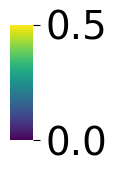

In [376]:
figsize(0.3, 1.5)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

axins1 = inset_axes(ax,
                    width="100%",  # width = 50% of parent_bbox width
                    height="100%",  # height : 5%
                    loc='right')

#plt.scatter(pca_tab.PC1, pca_tab.PC2, c='gray', s=75, edgecolors='none', alpha=0.1)
sc = ax.scatter([0, 0], [0, 0], c = [0, 1], s=1, edgecolors='none', vmin=0, vmax=0.5, cmap=cm.viridis)


ax.tick_params(labelsize=28, length=5)
#     cb = plt.colorbar(sc, shrink = 0.8, ax=ax)
#     cb.set_label(label='$\Psi$',size=28)
#     cb.ax.tick_params(labelsize=28, length=5)
#     cb.outline.set_visible(False)

cb = fig.colorbar(sc, cax = axins1, ticks=[0, 0.5, 1])
#     cb.set_label(label='$\Psi$',size=28)
cb.ax.tick_params(labelsize=28, length=5)
cb.outline.set_visible(False)
# axins1.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


plt.setp(ax.get_yticklabels(), visible=False)
ax.yaxis.set_ticks_position('none')
plt.setp(ax.get_xticklabels(), visible=False)
ax.xaxis.set_ticks_position('none')


cb.outline.set_visible(False)

plt.savefig('plots_review/figure3/events/colorbar_05.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/events/colorbar_05.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/events/colorbar_05.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

plt.show()

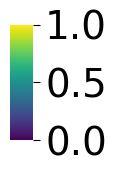

In [377]:
figsize(0.3, 1.5)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

axins1 = inset_axes(ax,
                    width="100%",  # width = 50% of parent_bbox width
                    height="100%",  # height : 5%
                    loc='right')

#plt.scatter(pca_tab.PC1, pca_tab.PC2, c='gray', s=75, edgecolors='none', alpha=0.1)
sc = ax.scatter([0, 0], [0, 0], c = [0, 1], s=1, edgecolors='none', vmin=0, vmax=1, cmap=cm.viridis)


ax.tick_params(labelsize=28, length=5)
#     cb = plt.colorbar(sc, shrink = 0.8, ax=ax)
#     cb.set_label(label='$\Psi$',size=28)
#     cb.ax.tick_params(labelsize=28, length=5)
#     cb.outline.set_visible(False)

cb = fig.colorbar(sc, cax = axins1, ticks=[0, 0.5, 1])
#     cb.set_label(label='$\Psi$',size=28)
cb.ax.tick_params(labelsize=28, length=5)
cb.outline.set_visible(False)
# axins1.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


plt.setp(ax.get_yticklabels(), visible=False)
ax.yaxis.set_ticks_position('none')
plt.setp(ax.get_xticklabels(), visible=False)
ax.xaxis.set_ticks_position('none')


cb.outline.set_visible(False)

plt.savefig('plots_review/figure3/events/colorbar.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/events/colorbar.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/events/colorbar.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()


In [378]:
chen_filtered_lax = filter_psi(chen_PSI, chen_int_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'], 
                           chen_read_counts, 10, 0, cell_min=0.1)

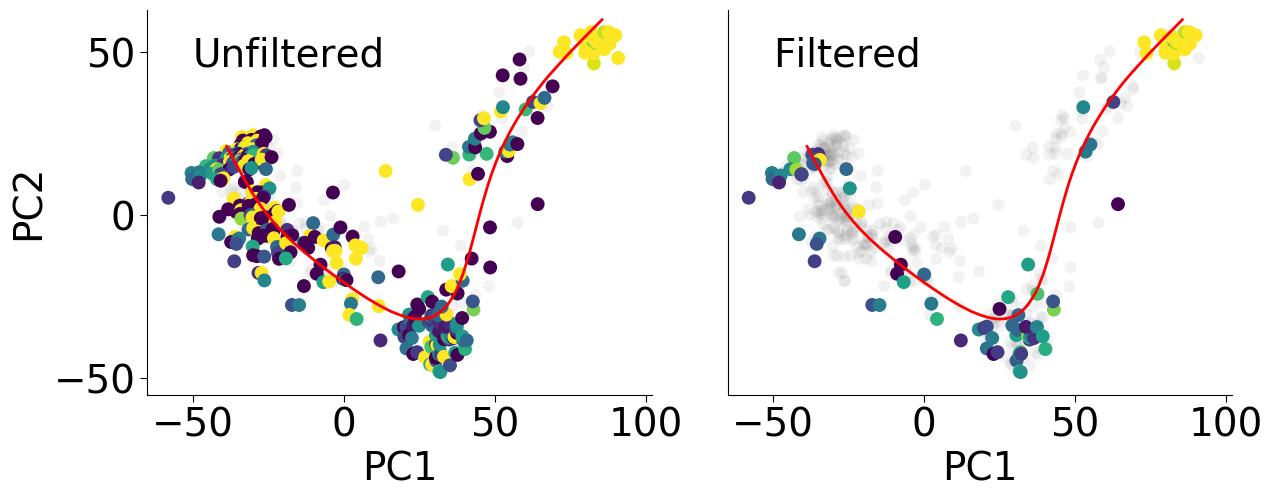

In [379]:
figsize(14, 5)
fig = plt.figure()

# fig.suptitle('p-values of anova test', fontsize=24)

gs = GridSpec(1,2)
gs.update(wspace=0.15, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
# ax_3 = fig.add_subplot(gs[0,2])
# ax_4 = fig.add_subplot(gs[0,3])
# ax_5 = fig.add_subplot(gs[0,4])
# ax_6 = fig.add_subplot(gs[0,5])

# ax_1.set_ylim((-0.05,1.05))
# ax_2.set_ylim((-0.05,1.05))
# ax_3.set_ylim((-0.05,1.05))
# ax_4.set_ylim((-0.05,1.05))

plot_exon(ax_1, chen_PSI, chen_pca_clust, 'Cadm1_2', vmin=0, vmax=1)
plot_exon(ax_2, chen_filtered_lax[0], chen_pca_clust, 'Cadm1_2', vmin=0, vmax=1)
# plot_exon(ax_3, chen_filtered[0], chen_pca_clust, 'Rbm39_nmdSE_2', vmin=0, vmax=0.5)
# plot_exon(ax_4, chen_filtered[0], chen_pca_clust, 'Rpn2_1', vmin=0, vmax=1)
# plot_exon(ax_5, chen_filtered[0], chen_pca_clust, 'Tecr_4', vmin=0, vmax=1)
# plot_exon(ax_6, chen_filtered[0], chen_pca_clust, 'Zfp207_1', vmin=0, vmax=1)


plt.setp(ax_2.get_yticklabels(), visible=False)
# plt.setp(ax_3.get_yticklabels(), visible=False)
# plt.setp(ax_4.get_yticklabels(), visible=False)
# plt.setp(ax_5.get_yticklabels(), visible=False)
# plt.setp(ax_6.get_yticklabels(), visible=False)

ax_2.yaxis.set_ticks_position('none')
# ax_3.yaxis.set_ticks_position('none')
# ax_4.yaxis.set_ticks_position('none')
# ax_5.yaxis.set_ticks_position('none')
# # ax_6.yaxis.set_ticks_position('none')

ax_1.text(-50, 55, 'Unfiltered', fontsize=28, verticalalignment='top')
ax_2.text(-50, 55, 'Filtered', fontsize=28, verticalalignment='top')
# ax_3.text(-50, 55, 'Rbm39', fontsize=28, verticalalignment='top')
# ax_4.text(-50, 55, 'Rpn2', fontsize=28, verticalalignment='top')
# ax_5.text(-50, 55, 'Tecr', fontsize=28, verticalalignment='top')
# ax_6.text(-50, 55, 'Zfp207', fontsize=28, verticalalignment='top')
# ax_2.text(0.05, 1, 'Lescroart', fontsize=24, verticalalignment='top')
# ax_3.text(0.05, 1, 'Trapnell', fontsize=24, verticalalignment='top')
# ax_4.text(0.05, 1, 'Song', fontsize=24, verticalalignment='top')

# ax_3.set_xticks([0, 0.5, 1], ['0', '0.5', '1'])
            
ax_1.set_ylabel('PC2', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/events/Cadm1_2_all.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/events/Cadm1_2_all.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/events/Cadm1_2_all.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()


